# Bench Plotting
Given the output from the benchmarking pipeline, this notebook plots relevant figures given the path to the output CSVs. 


In [18]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="pastel", rc={"figure.dpi":300, 'savefig.dpi':300})

# Define color palette

The color palette defined for PhageFilter consists of different shades of purple. The palette is defined here.

In [19]:
plot_title_color = "#000000"#"#3f007d"
plot_axis_color = "#000000" #"#3f007d"
project_colors = ['#efedf5', '#dadaeb', '#bcbddc', '#9e9ac8', '#807dba', '#6a51a3', '#54278f', '#3f007d']

project_colors += project_colors[::-1]
sns.set_palette(project_colors)

## Helper Methods

Helper methods are used throughout the notebook for help with plotting. This cell must be ran before jumping to different sections.

In [20]:
def csv2dataframe(csv_file):
    """
    Converts the csv file to a pandas dataframe.
    """
    return pandas.read_csv(csv_file)

---
---
## *A - Performance Testing*
---
---
This section of the notebook is used for plotting the performance benchmarking output from the pipeline. The referenced CSV may be changed, though the current relative path points to data used in the manuscript.

### A.1 - parsing csv

In [21]:
performance_csv = "../results/res_performance_benchmarking.csv"

In [22]:
# open dataframe
df = csv2dataframe(performance_csv)
df.describe()

genome count  number of reads  build time (ns)  build mem (bytes)  \
count     36.000000        36.000000     3.600000e+01          36.000000   
mean      55.000000     27775.000000     6.514630e+09      226118.666667   
std       28.804762     42472.467553     4.003675e+09       88796.274578   
min       11.000000       100.000000     7.880666e+08       59372.000000   
25%       33.000000       775.000000     3.340152e+09      168076.000000   
50%       55.000000      5500.000000     6.404925e+09      256368.000000   
75%       77.000000     32500.000000     9.392235e+09      292404.000000   
max       99.000000    100000.000000     1.297020e+10      324788.000000   

       query time (ns)  query memory (bytes)     recall  precision  \
count     3.600000e+01             36.000000  36.000000  36.000000   
mean      1.913201e+09         145194.444444   0.904040   0.800199   
std       2.640272e+09          70402.329385   0.275693   0.169805   
min       1.007517e+08          32432.000000   0.090909   0.478261   
25%       3.342671e+08          93477.000000   1.000000   0.647059   
50%       5.245708e+08         136100.000000   1.000000   0.846154   
75%       1.467965e+09         216861.000000   1.000000   1.000000   
max       8.199782e+09         239172.000000   1.000000   1.000000   

       avg. read count error  
count              36.000000  
mean              276.119949  
std              1505.602665  
min                 0.000000  
25%                 0.000000  
50%                 0.045455  
75%                 1.386364  
max              9045.000000

In [23]:
# transformations
df["Build Memory (MB)"] = df["build mem (bytes)"] / (10)**3
df["Build Time (seconds)"] = df["build time (ns)"] / (10**9)
df["Query Memory (MB)"] = df["query memory (bytes)"] / (10)**3
df["Query Time (seconds)"] = df["query time (ns)"] / (10**9)

# new dataframes grouped by read or genome count
df_groupbyreads =  df.groupby(["number of reads"], as_index=False).mean()
df_groupbygenomecount =  df.groupby(["genome count"], as_index=False).mean()

### A.2 - plotting query time and memory vs (genomes count & read count)

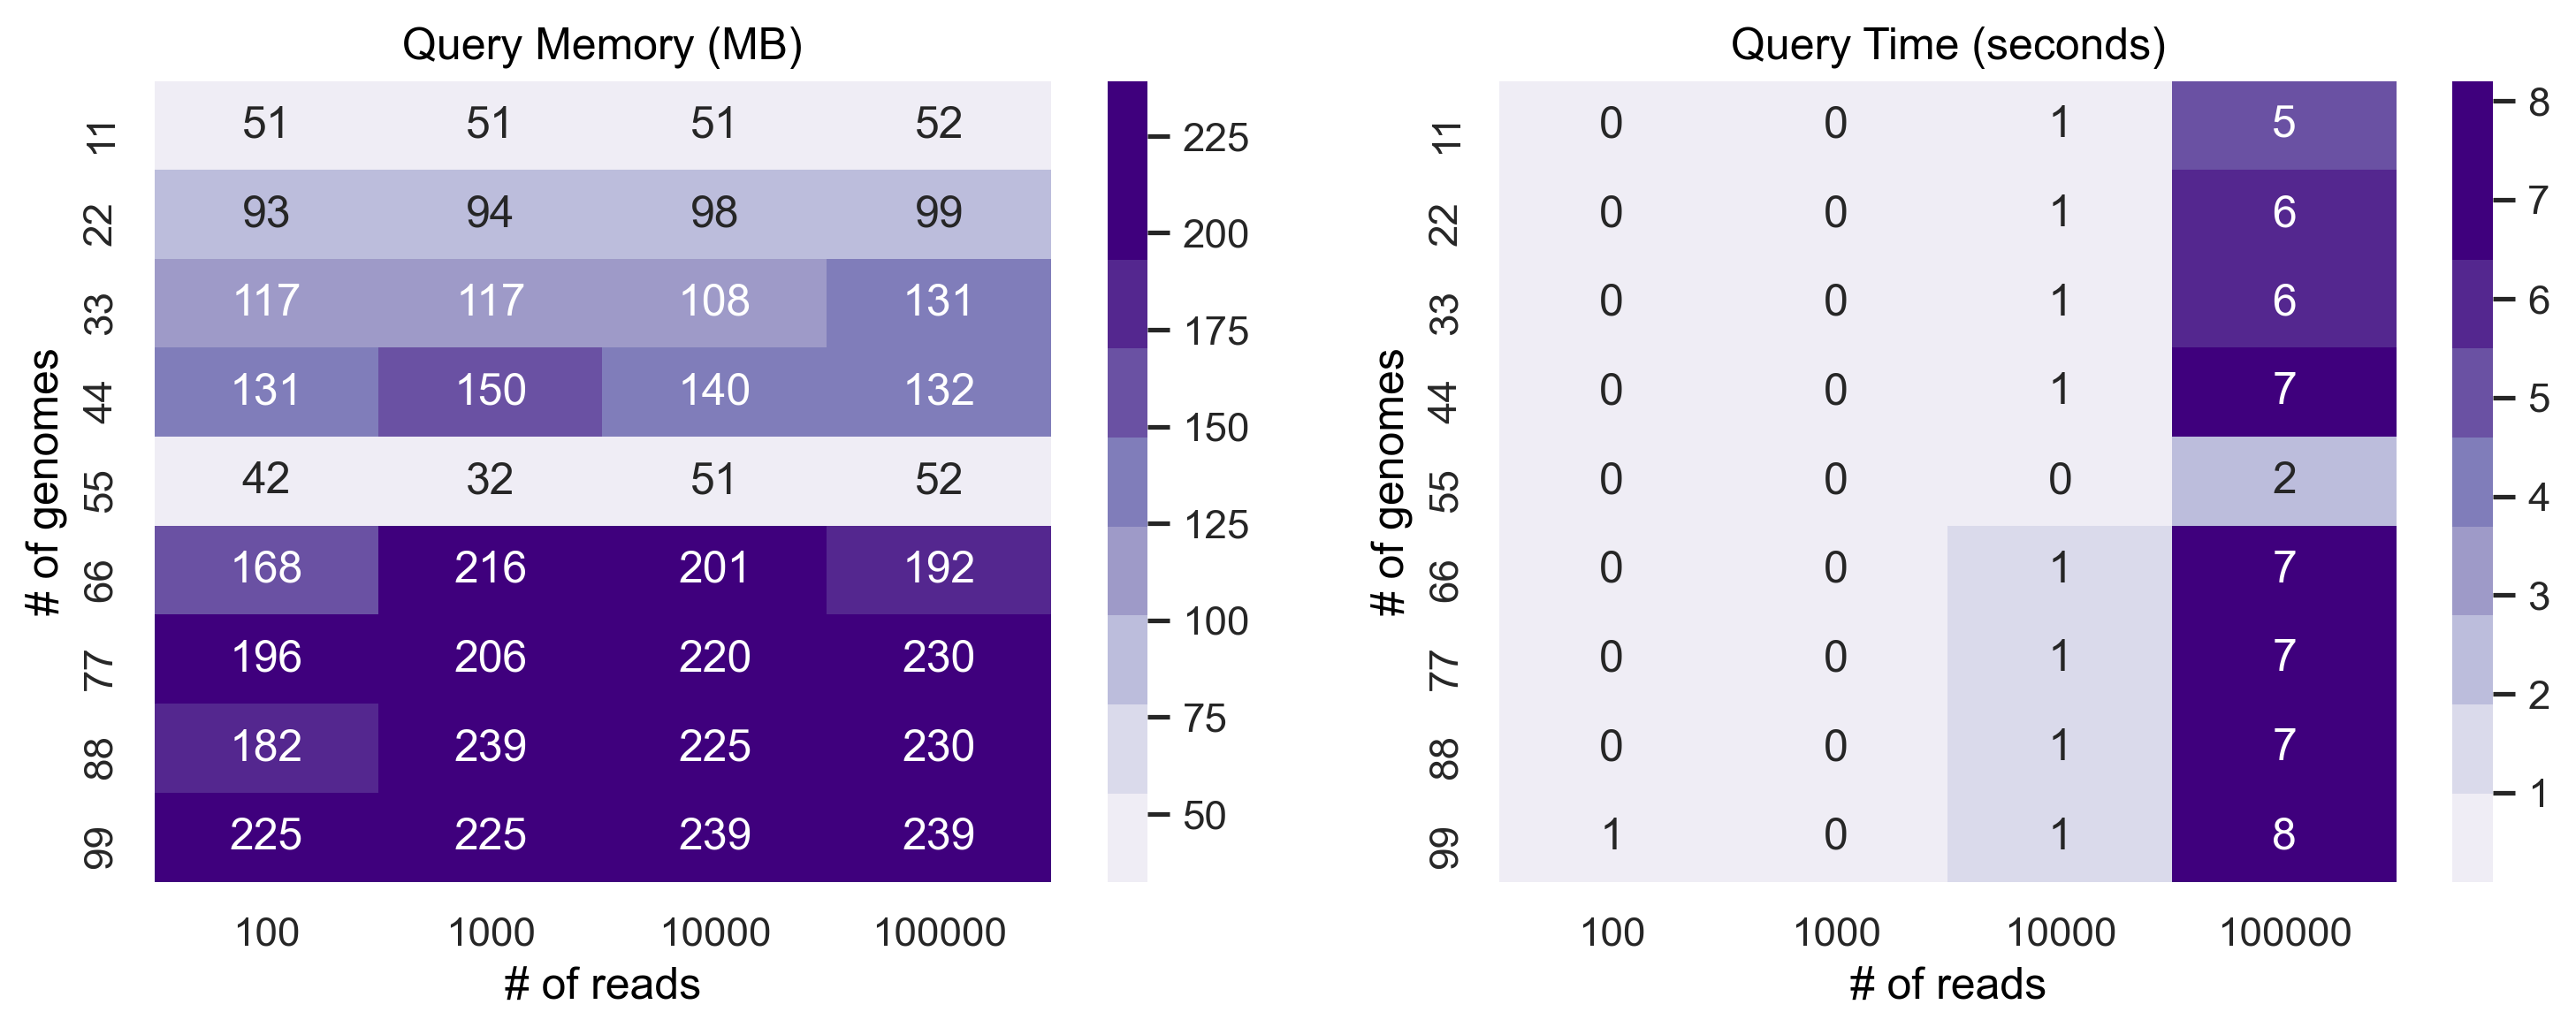

In [24]:
# A PD dataframe pivot is used here to combine values into a format usable in the heatmap.
matrix1 = df.pivot(index='genome count', columns='number of reads', values=f"Query Memory (MB)")
matrix2 = df.pivot(index='genome count', columns='number of reads', values=f"Query Time (seconds)")

# Set the figure size and create the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Create the first heatmap
sns.heatmap(matrix1, annot=True, fmt=".0f", cmap=project_colors[:9], ax=axs[0])#, vmin=0.30, vmax=500)

# Set the title and axis labels for the first heatmap
axs[0].set_title(f"Query Memory (MB)", color=plot_title_color)
axs[0].set_xlabel("# of reads", color=plot_axis_color)
axs[0].set_ylabel("# of genomes", color=plot_axis_color)

# Create the second heatmap
sns.heatmap(matrix2, annot=True, fmt=".0f", cmap=project_colors[:9], ax=axs[1])

# Set the title and axis labels for the second heatmap
axs[1].set_title(f"Query Time (seconds)", color=plot_title_color)
axs[1].set_xlabel("# of reads", color=plot_axis_color)
axs[1].set_ylabel("# of genomes", color=plot_axis_color)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

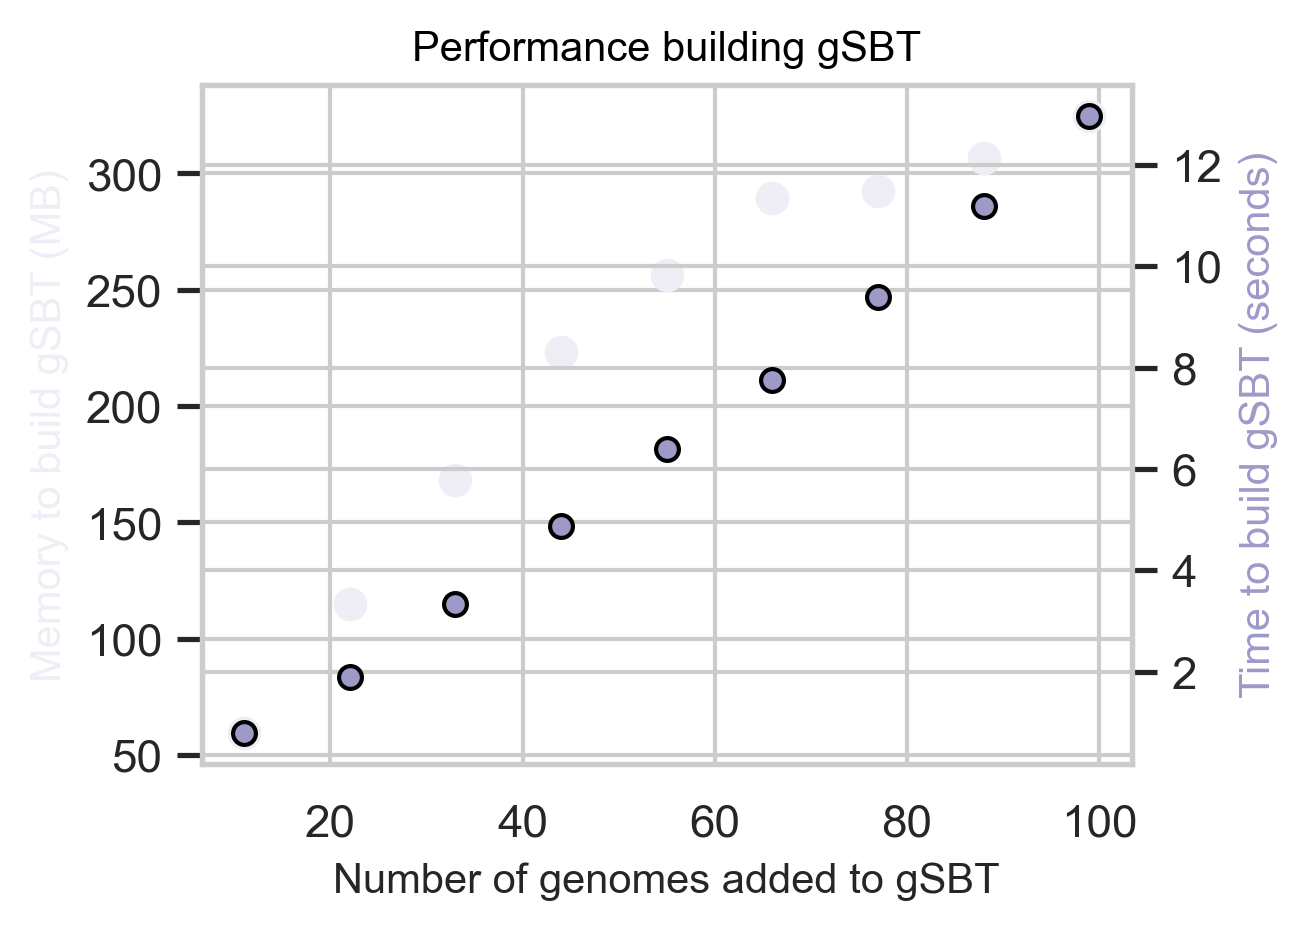

In [25]:
fig, ax1 = plt.subplots(figsize=(4, 3))
ax2 = ax1.twinx()

# add data
ax1.scatter(df_groupbygenomecount["genome count"], df_groupbygenomecount["Build Memory (MB)"], s=50, color=project_colors[0], label="memory")
ax2.scatter(df_groupbygenomecount["genome count"], df_groupbygenomecount["Build Time (seconds)"], s=30, color=project_colors[-4], edgecolor="black", label="time")

# configure axis labels
plt.title('Performance building gSBT', size=10, color=plot_title_color)
ax1.set_xlabel('Number of genomes added to gSBT', size=10)
ax1.set_ylabel('Memory to build gSBT (MB)', size=10, color=project_colors[0])
ax2.set_ylabel('Time to build gSBT (seconds)', size=10, color=project_colors[-4])
plt.show()

## A.3 - Running time per number of reads (number of genomes as legend)

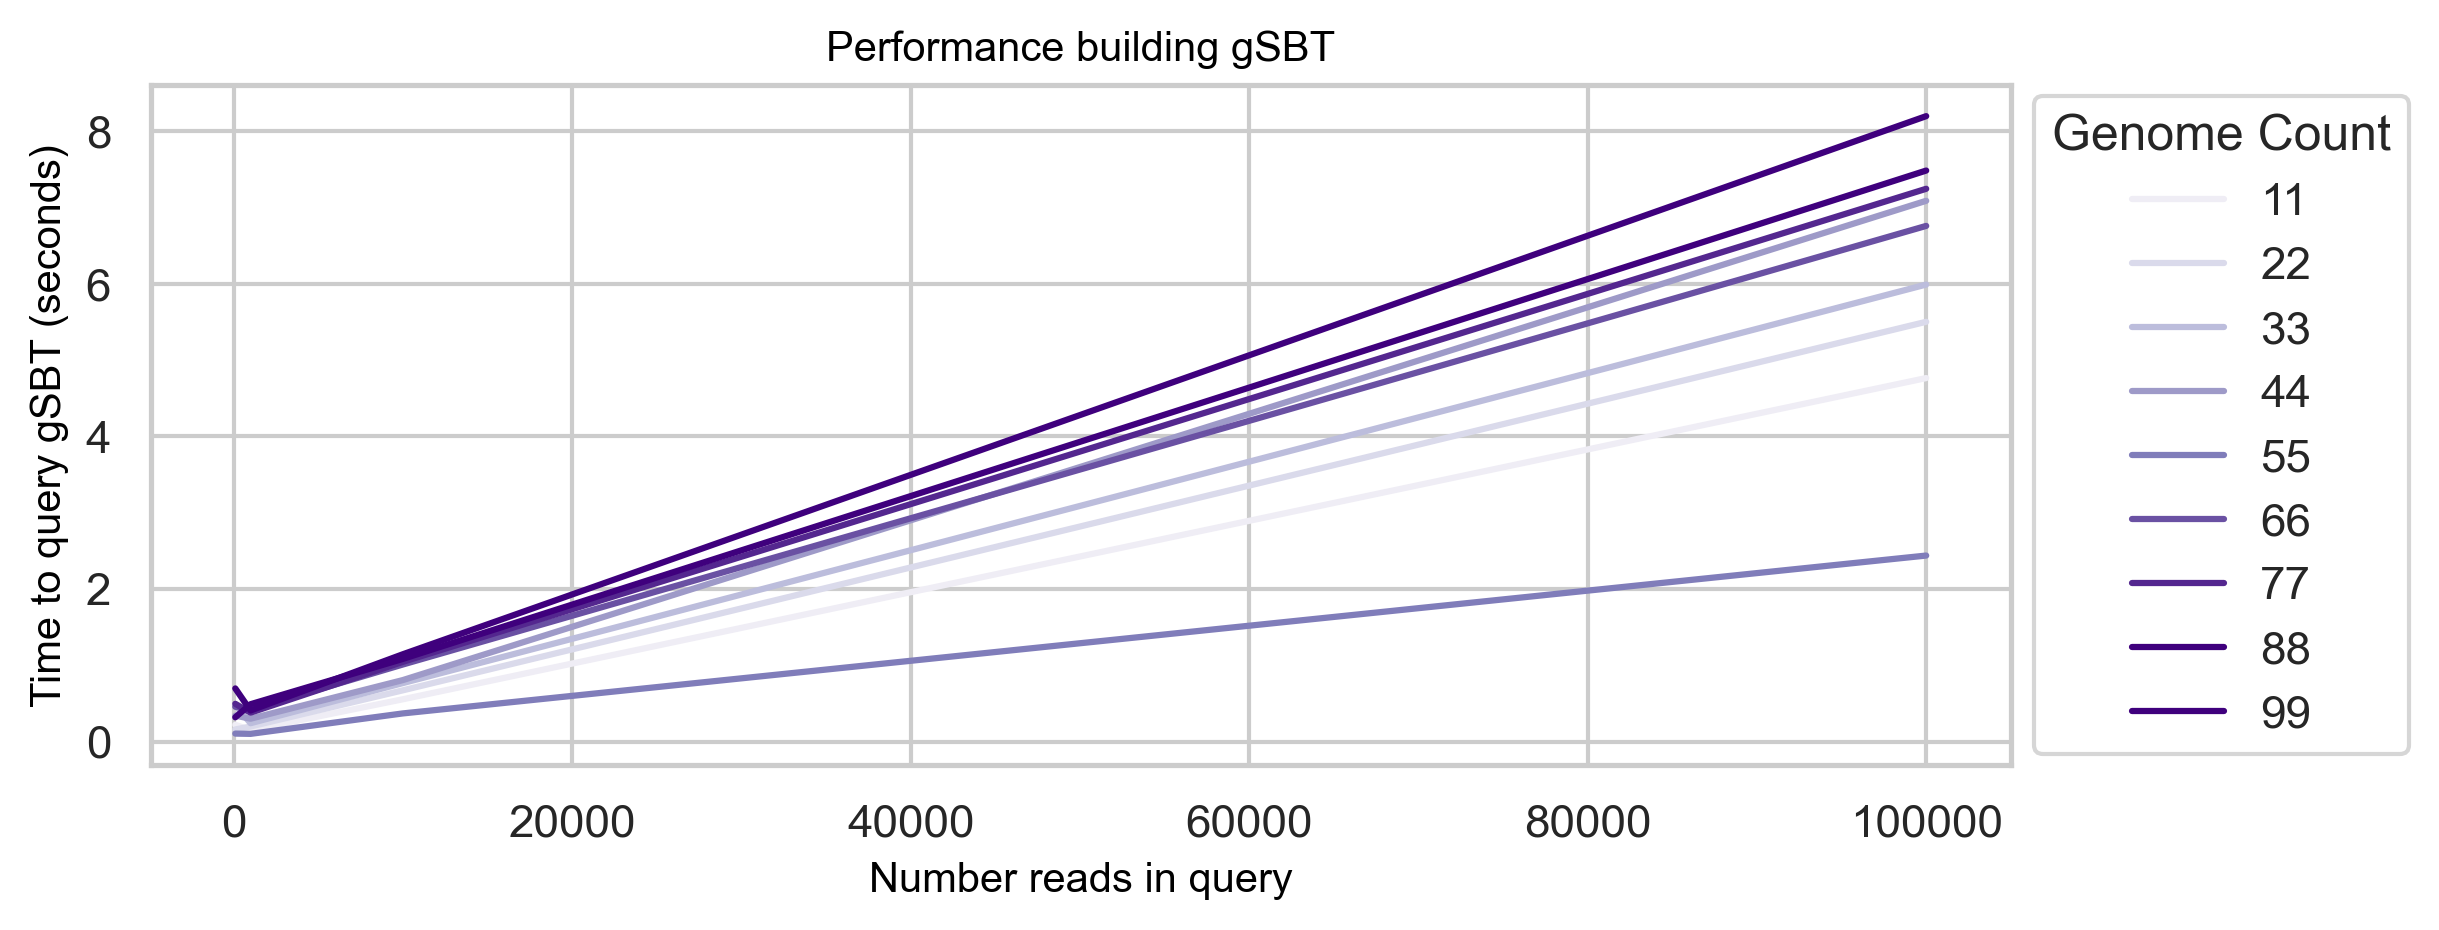

In [26]:
fig, ax1 = plt.subplots(figsize=(8, 3))

# add data
number_of_genomecounts = len(pandas.unique(df["genome count"]))
sns.lineplot(data=df, x="number of reads", y="Query Time (seconds)", palette=project_colors[:number_of_genomecounts], hue="genome count")

# put legend on the right
legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Genome Count")

# configure axis labels
plt.title('Performance building gSBT', size=10, color=plot_title_color)
ax1.set_xlabel('Number reads in query', size=10, color=plot_axis_color)
ax1.set_ylabel('Time to query gSBT (seconds)', size=10, color=plot_axis_color)
plt.show()

### Query time per gSBT size

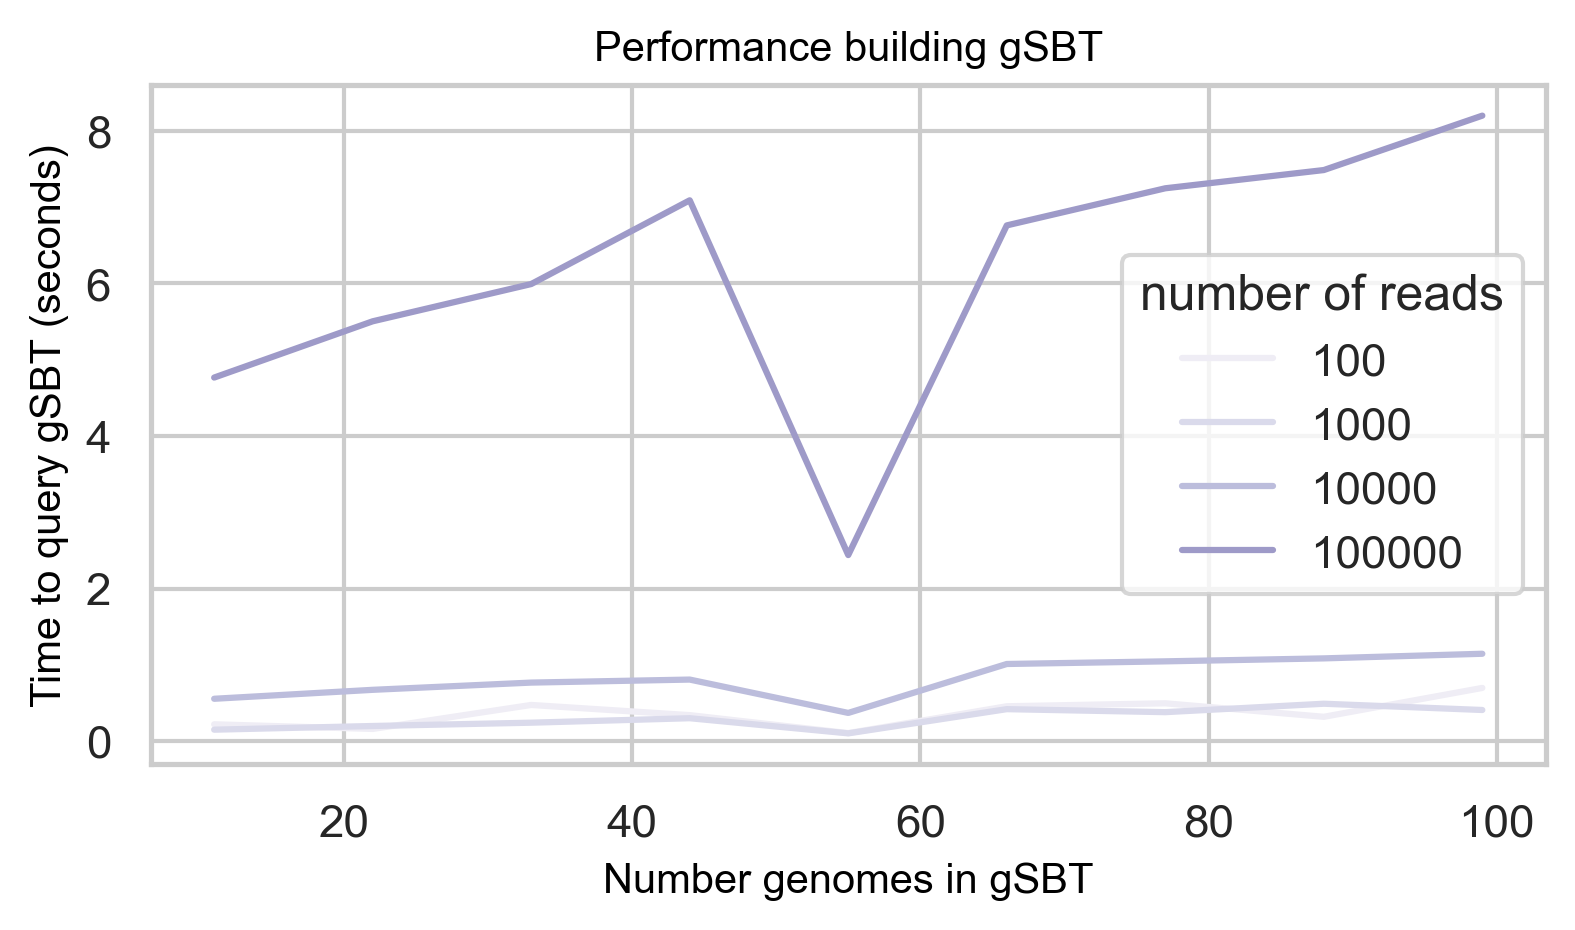

In [27]:
fig, ax1 = plt.subplots(figsize=(6, 3))

# add data
color_count = len(pandas.unique(df["number of reads"]))
sns.lineplot(data=df, x="genome count", y="Query Time (seconds)", hue="number of reads", palette=project_colors[:color_count])

# configure axis labels
plt.title('Performance building gSBT', size=10, color=plot_title_color)
ax1.set_xlabel('Number genomes in gSBT', size=10, color=plot_axis_color)
ax1.set_ylabel('Time to query gSBT (seconds)', size=10, color=plot_axis_color)
plt.show()

---
---
## B - Genomes Benchmarking(Plotting)
---
---

### B.1 - parsing

In [73]:
genomes_csv = "../results/res_genomes.csv"

In [74]:
# open dataframe
df = csv2dataframe(genomes_csv)
df.describe()

cache size  genome count     time (ns)  memory (bytes)   11  11.1  \
count   43.000000     43.000000  4.300000e+01       43.000000  0.0   0.0   
mean    39.651163     70.348837  1.083276e+10   152571.162791  NaN   NaN   
std     23.041251     23.041251  4.818124e+09    68511.219956  NaN   NaN   
min     11.000000     22.000000  2.289896e+09    54792.000000  NaN   NaN   
25%     22.000000     55.000000  7.165003e+09   103758.000000  NaN   NaN   
50%     33.000000     77.000000  1.048019e+10   146216.000000  NaN   NaN   
75%     55.000000     88.000000  1.395404e+10   204992.000000  NaN   NaN   
max     88.000000     99.000000  2.452845e+10   289904.000000  NaN   NaN   

       889553960  46704  
count        0.0    0.0  
mean         NaN    NaN  
std          NaN    NaN  
min          NaN    NaN  
25%          NaN    NaN  
50%          NaN    NaN  
75%          NaN    NaN  
max          NaN    NaN

In [75]:
# transformations
df["Memory (MB)"] = df["memory (bytes)"] / (10)**3
df["Time (minutes)"] = df["time (ns)"] / (10**9 * 60)

### B.2 - plotting

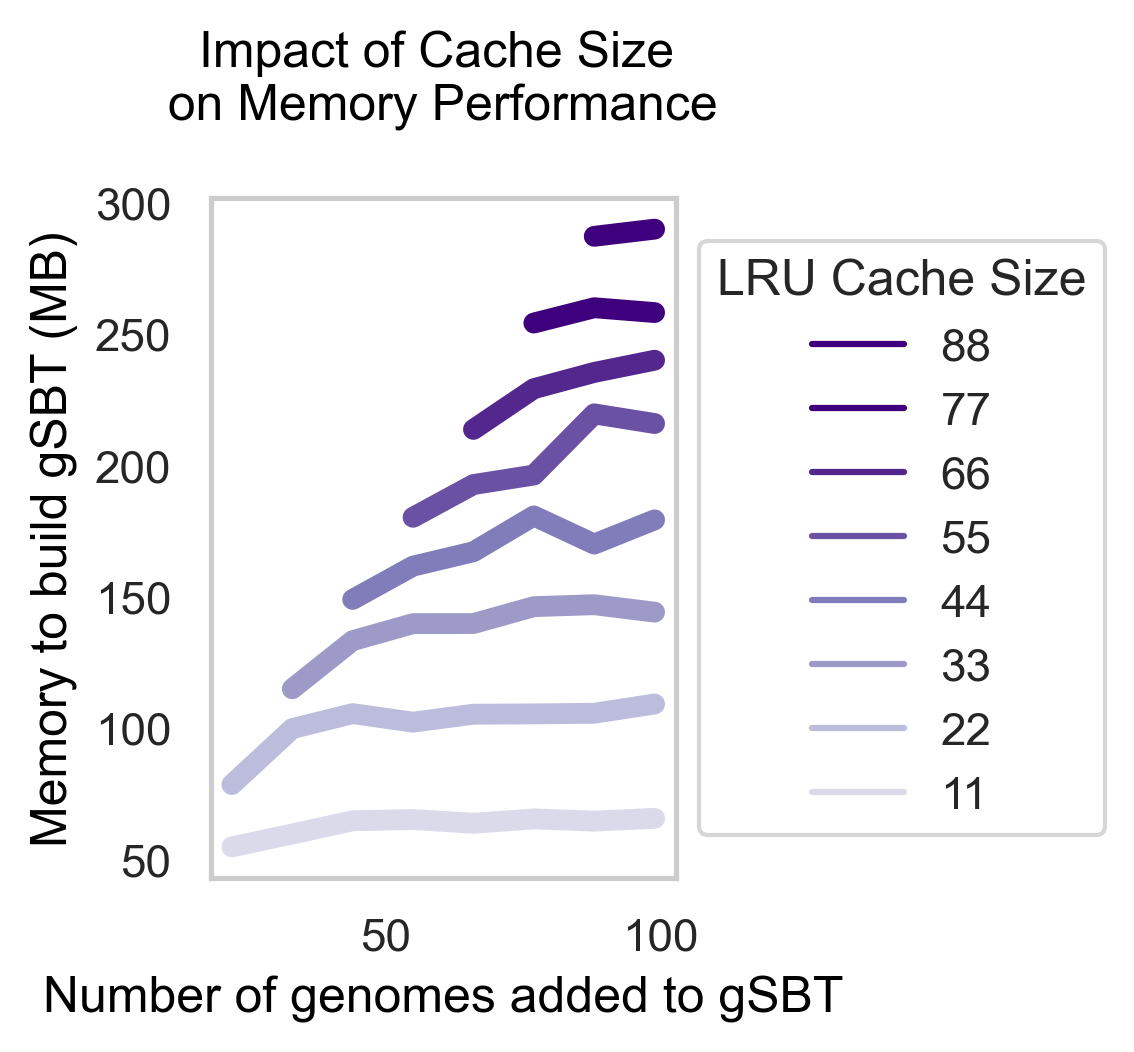

In [76]:
fig, ax1 = plt.subplots(figsize=(2, 3))
ax1.grid(False)

# add data
color_count = len(pandas.unique(df["cache size"]))
sns.lineplot(data=df, x="genome count", y="Memory (MB)", linewidth = 5, hue="cache size", palette=project_colors[1:1+color_count])

# add legend to right side
handles, labels = ax1.get_legend_handles_labels()
legend = ax1.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)
legend.set_title("LRU Cache Size")

# configure axis labels
plt.title('Impact of Cache Size \n on Memory Performance \n', color=plot_title_color)
ax1.set_xlabel('Number of genomes added to gSBT', color=plot_axis_color)
ax1.set_ylabel('Memory to build gSBT (MB)', color=plot_axis_color)
plt.show()

---
---
## C - Parameterization Benchmarking (Plotting)
---
---

### C.1 - parsing

In [33]:
pameterization_csv = "../results/res_parameterization.csv"

In [34]:
# open dataframe
df = csv2dataframe(pameterization_csv)
df.describe()

replicate    kmer size        theta   error rate  number of genomes  \
count     2400.0  2400.000000  2400.000000  2400.000000             2400.0   
mean         1.0    27.500000     0.450000     0.050000               50.0   
std          0.0    11.458827     0.287288     0.034164                0.0   
min          1.0    10.000000     0.000000     0.000000               50.0   
25%          1.0    18.750000     0.200000     0.020000               50.0   
50%          1.0    27.500000     0.450000     0.050000               50.0   
75%          1.0    36.250000     0.700000     0.080000               50.0   
max          1.0    45.000000     0.900000     0.100000               50.0   

       read count          time        memory  classification recall  \
count      2400.0  2.400000e+03   2400.000000            2400.000000   
mean       1000.0  2.440321e+08  27701.048333               0.868530   
std           0.0  1.365375e+08    561.211862               0.273812   
min        1000.0  3.505851e+07  26760.000000               0.000000   
25%        1000.0  1.408628e+08  27576.000000               0.940000   
50%        1000.0  2.417142e+08  27776.000000               1.000000   
75%        1000.0  3.002095e+08  27860.000000               1.000000   
max        1000.0  1.028822e+09  30060.000000               1.000000   

       classification precision  filter recall  filter precision  \
count               2400.000000    2400.000000       2400.000000   
mean                   0.828016       0.530456          0.907907   
std                    0.286411       0.406042          0.206320   
min                    0.000000       0.000000          0.000000   
25%                    0.833333       0.099747          0.992395   
50%                    1.000000       0.489000          1.000000   
75%                    1.000000       1.000000          1.000000   
max                    1.000000       1.000000          1.000000   

       avg read count error  
count           2363.000000  
mean             155.279793  
std              279.496436  
min                0.000000  
25%                4.577778  
50%               11.800000  
75%               99.000000  
max              988.000000

In [35]:
# transformations
df["F1"] = 2* df["classification precision"]*df["classification recall"] / (df["classification precision"]+df["classification recall"])
df["filter F1"] = 2* df["filter precision"]*df["filter recall"] / (df["filter precision"]+df["filter recall"])
df["read count error"] = pandas.to_numeric(df["avg read count error"].replace("nan", np.nan))

### C.2 - plotting

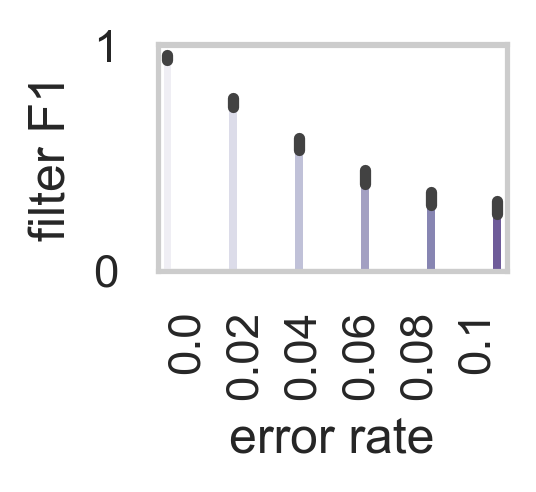

In [36]:
fig, ax1 = plt.subplots(figsize=(1.5, 1))
ax = sns.barplot(data=df, x="error rate", y="filter F1", hue="error rate", lw=0.001, palette=project_colors)
ax.xaxis.set_tick_params(rotation=90)
ax.legend_.remove()
# legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# legend.set_title("Error Rate")

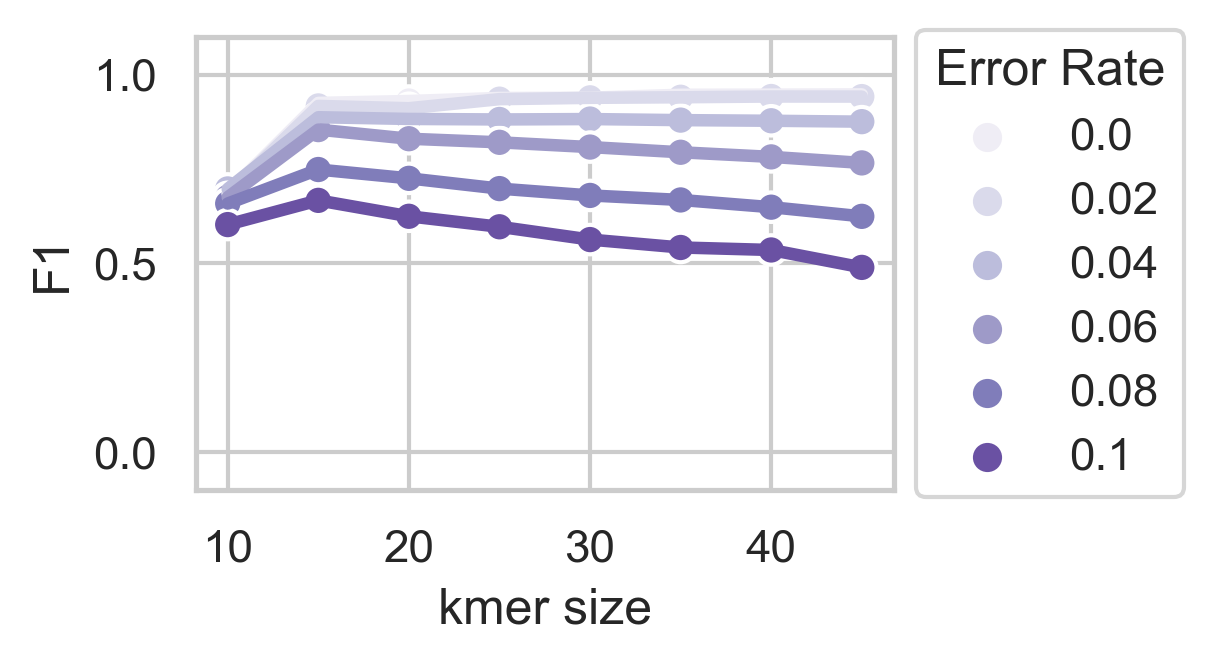

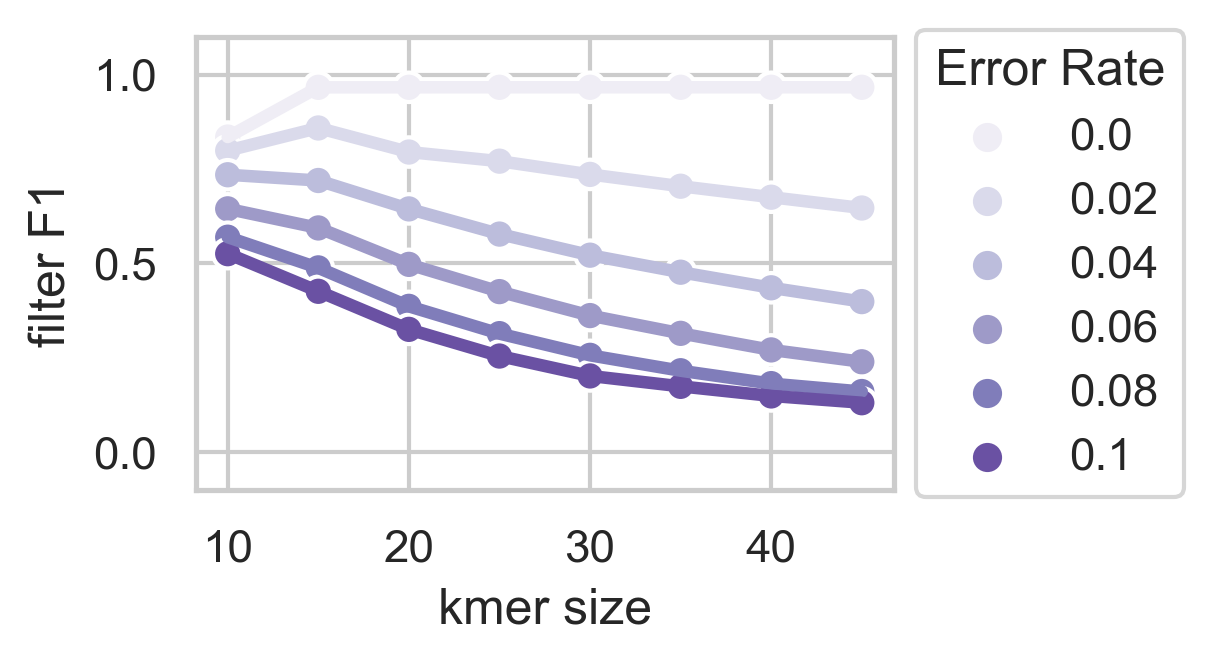

In [37]:
# plot-specific data transformation
df3 =  df.groupby(["kmer size", "error rate"], as_index=False).mean()

# plot 1
fig, ax1 = plt.subplots(figsize=(3, 2))
color_count = len(pandas.unique(df3["error rate"]))
ax = sns.scatterplot(data=df3, x="kmer size", y="F1", linewidth = 1, hue="error rate", s=50, palette=project_colors[:color_count])
ax = sns.lineplot(data=df3,  x="kmer size", y="F1", hue="error rate", linewidth = 3, palette=project_colors[:color_count], legend=False)
ax.set_ylim(bottom=-0.1, top=1.1)
legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Error Rate")

# plot 2
fig, ax1 = plt.subplots(figsize=(3, 2))
color_count = len(pandas.unique(df3["error rate"]))
ax = sns.scatterplot(data=df3, x="kmer size", y="filter F1", linewidth = 1, hue="error rate", s=50, palette=project_colors[:color_count])
ax = sns.lineplot(data=df3,  x="kmer size", y="filter F1", hue="error rate", linewidth = 3, palette=project_colors[:color_count], legend=False)
ax.set_ylim(bottom=-0.1, top=1.1)
legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Error Rate")

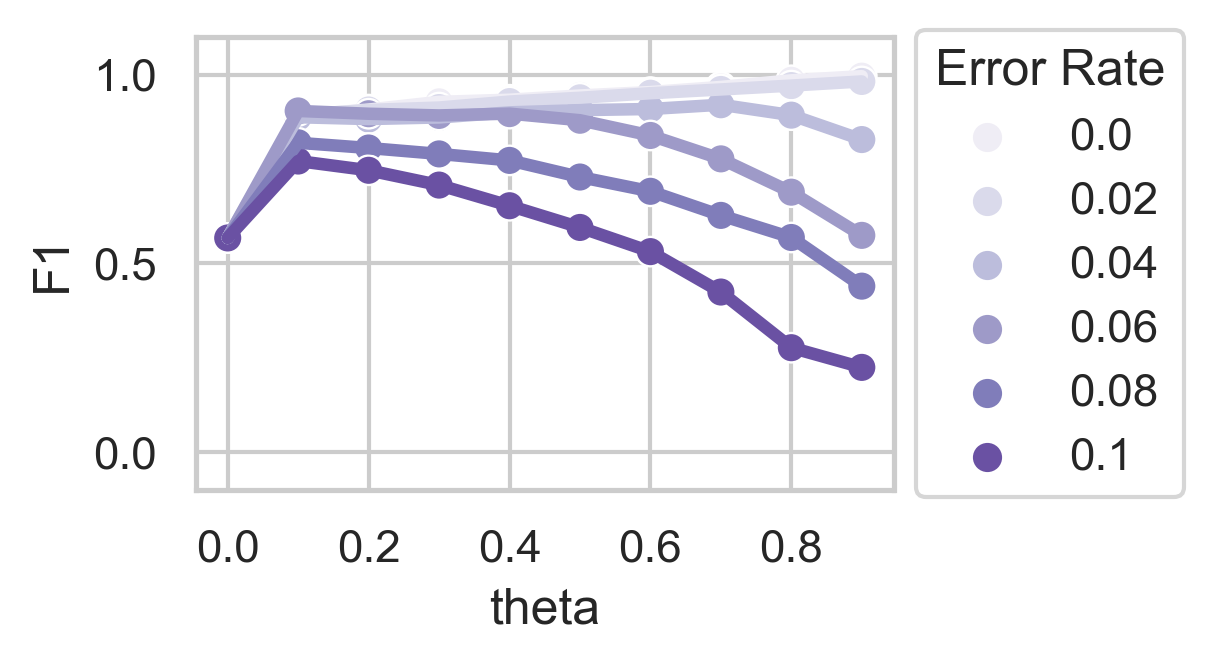

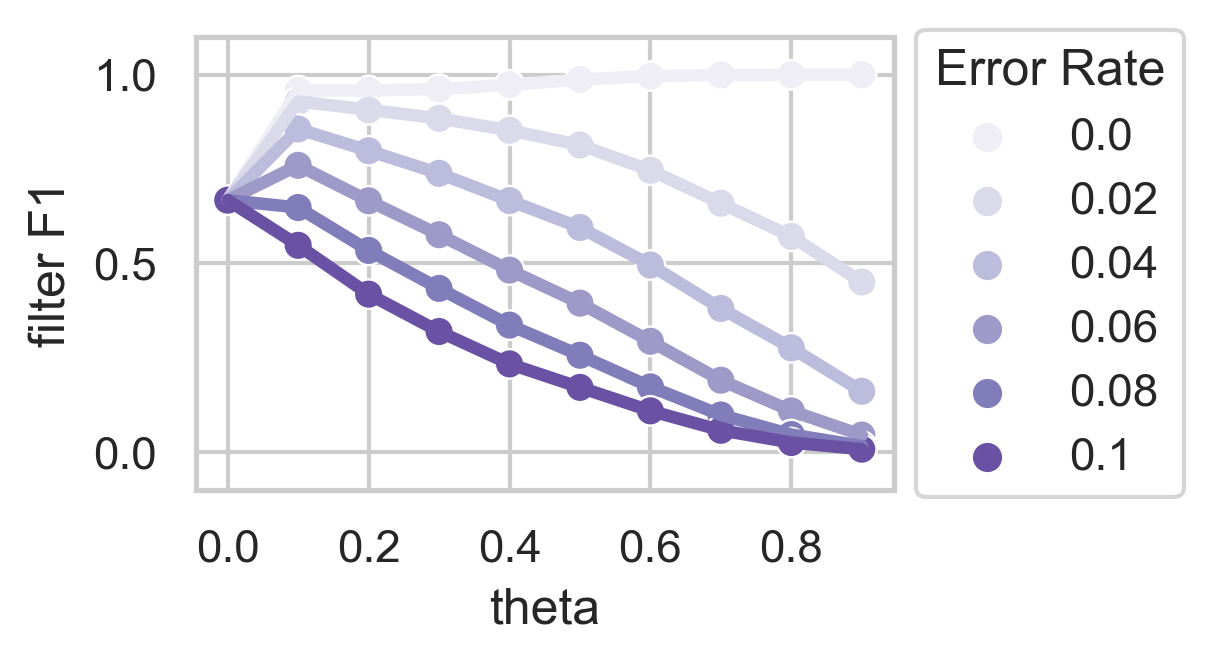

In [38]:
# plot-specific data transformation
df4 =  df.groupby(["theta", "error rate"], as_index=False).mean()

# plot
fig, ax1 = plt.subplots(figsize=(3, 2))
color_count = len(pandas.unique(df4["error rate"]))
ax = sns.scatterplot(data=df4, x="theta", y="F1", hue="error rate", s=50, palette=project_colors[0:color_count])
ax = sns.lineplot(data=df4, x="theta", y="F1", hue="error rate", linewidth = 3, palette=project_colors[0:color_count], legend=False)
ax.set_ylim(bottom=-0.1, top=1.1)
legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Error Rate")

fig, ax1 = plt.subplots(figsize=(3, 2))
color_count = len(pandas.unique(df4["error rate"]))
ax = sns.scatterplot(data=df4, x="theta", y="filter F1", hue="error rate", s=50, palette=project_colors[0:color_count])
ax = sns.lineplot(data=df4, x="theta", y="filter F1", hue="error rate", linewidth = 3, palette=project_colors[0:color_count], legend=False)
ax.set_ylim(bottom=-0.1, top=1.1)
legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Error Rate")

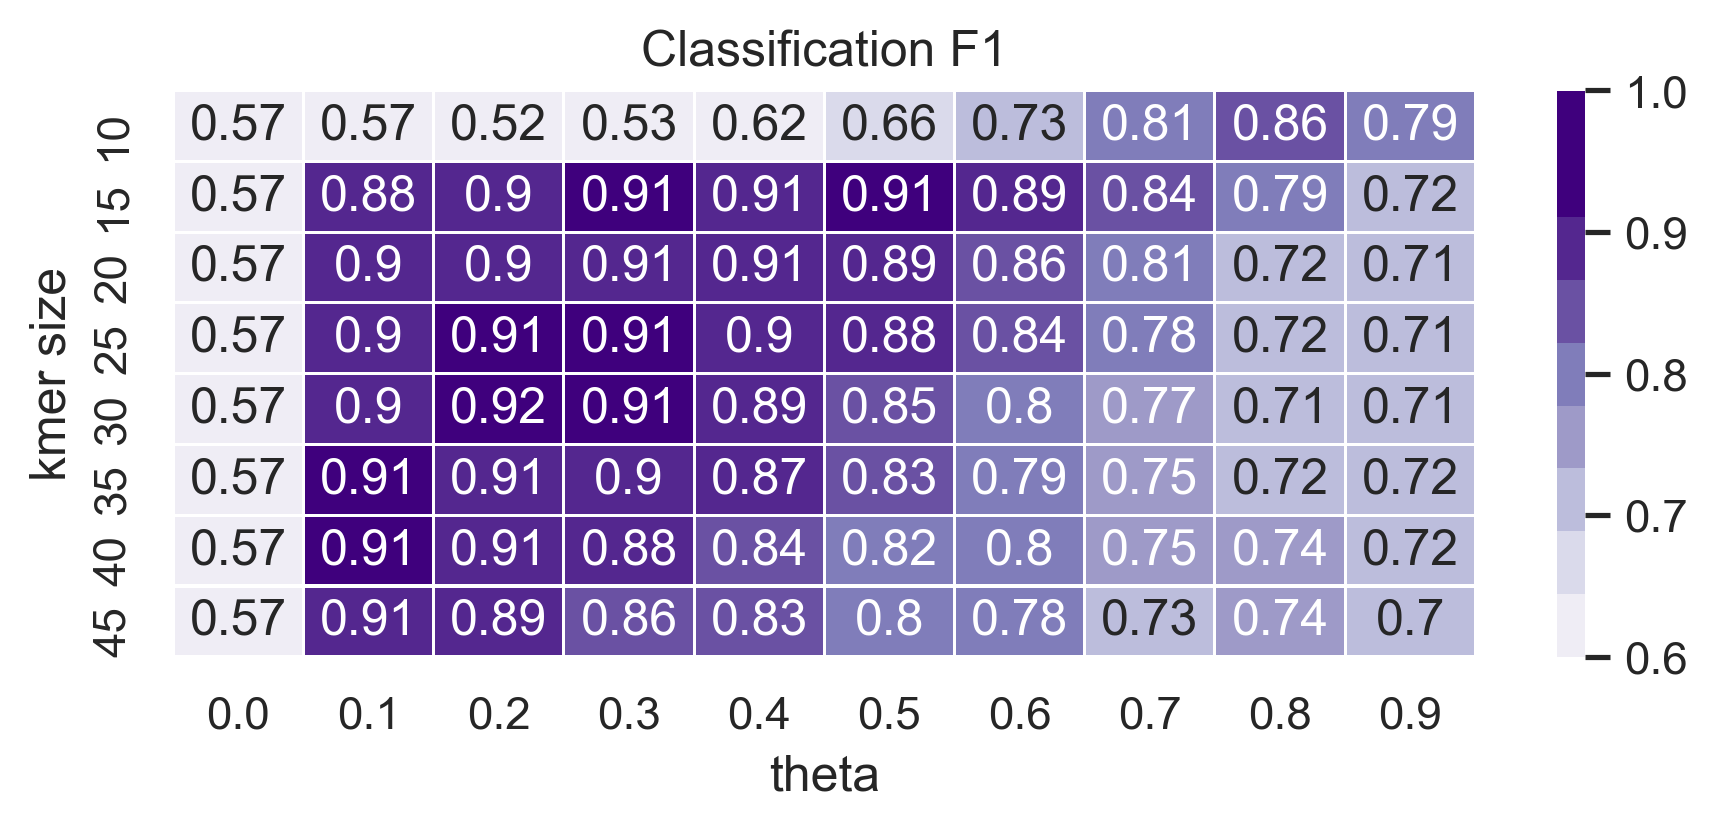

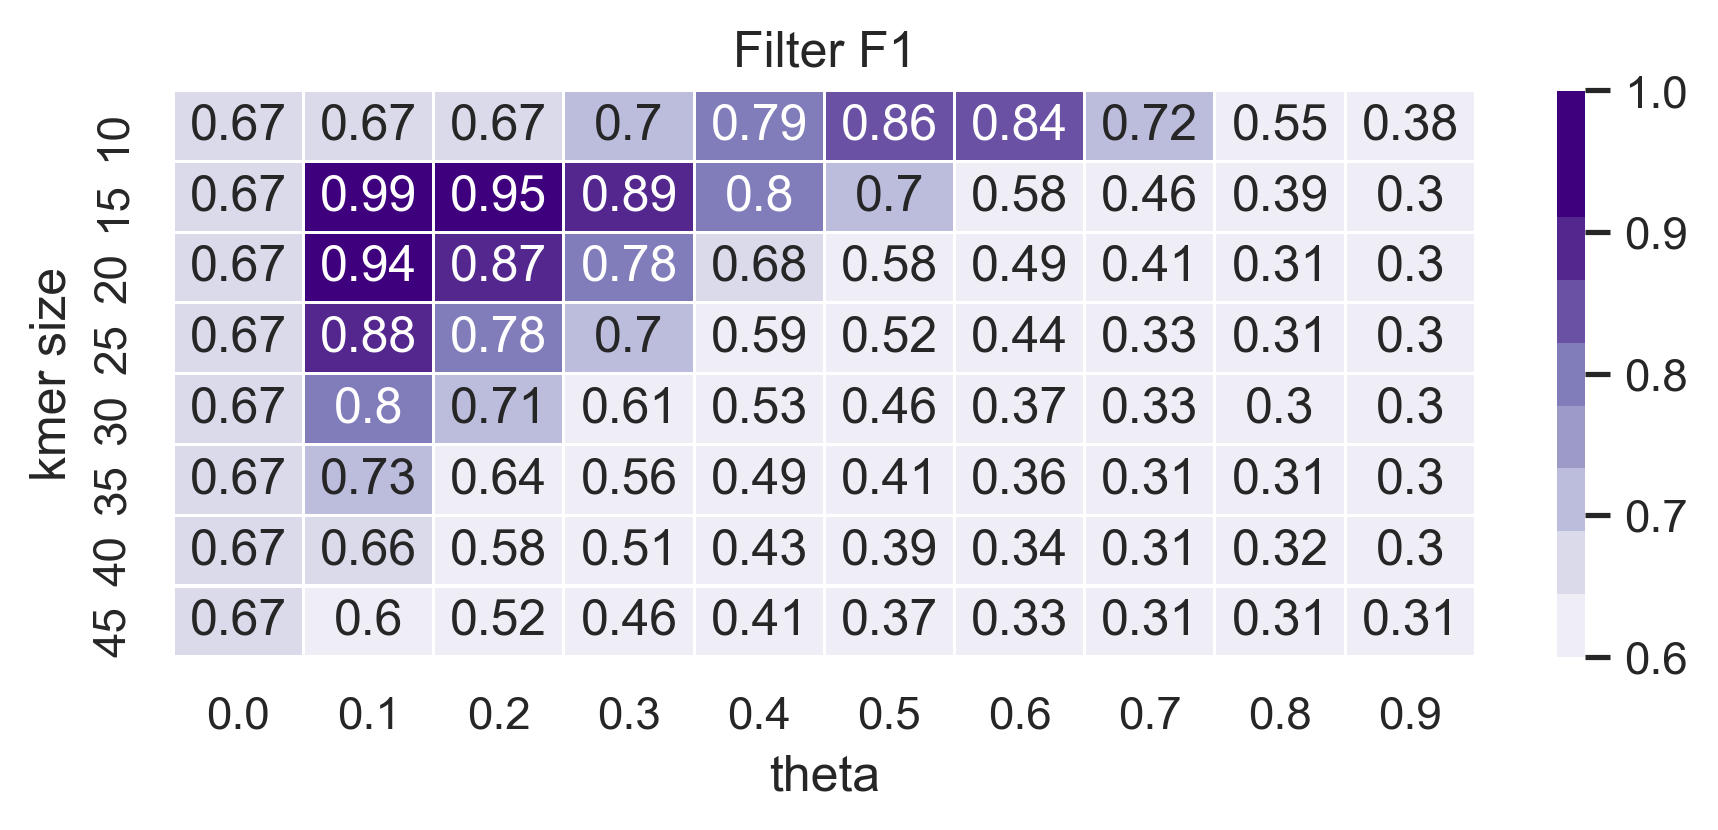

In [39]:
# plot-specific data transformation
df_heatmap = df[df["error rate"] >= 0.00]
df_heatmap = df_heatmap.groupby(["kmer size", "theta"], as_index=False).mean()
df_heatmap.describe()

# plotting (classification)
fig, ax = plt.subplots(figsize=(7, 2.5))
ax = sns.heatmap(data=df_heatmap.pivot("kmer size", "theta", "F1"), annot=True, linewidth=.5, cmap=project_colors[:9], vmin=0.6, vmax=1.0)
ax.set_title("Classification F1")
plt.show()

# plotting (filtering)
fig, ax = plt.subplots(figsize=(7, 2.5))
ax = sns.heatmap(data=df_heatmap.pivot("kmer size", "theta", "filter F1"), annot=True, linewidth=.5, cmap=project_colors[:9], vmin=0.6, vmax=1.0)
ax.set_title("Filter F1")
plt.show()

---
---
## D - Relative Performance Benchmarking (Plotting)
---
---

### D.1 - parsing

In [40]:
relative_performance_csv = "../results/res_relative_performance.csv"
df = csv2dataframe(relative_performance_csv)
df.describe()

genome count in reads  error rate          time         memory  \
count             216.000000  216.000000  2.160000e+02     216.000000   
mean               55.000000    0.050000  5.165600e+08  194777.888889   
std                28.467852    0.034236  4.079086e+08  194531.283509   
min                11.000000    0.000000  5.093203e+07   27076.000000   
25%                33.000000    0.020000  3.209935e+08   27100.000000   
50%                55.000000    0.050000  5.483891e+08  126778.000000   
75%                77.000000    0.080000  8.070943e+08  293298.000000   
max                99.000000    0.100000  4.048500e+09  500772.000000   

           recall   precision  read count error  
count  216.000000  216.000000        216.000000  
mean     0.993118    0.890884          2.549892  
std      0.027154    0.140809          3.569549  
min      0.777778    0.224490          0.000000  
25%      1.000000    0.822454          0.619472  
50%      1.000000    0.956522          1.510101  
75%      1.000000    1.000000          2.606061  
max      1.000000    1.000000         26.454545

In [41]:
# threshold
df["F1"] = 2* df["precision"]*df["recall"] / (df["precision"]+df["recall"])
df["Mean read count error"] = pandas.to_numeric(df["read count error"].replace("nan", np.nan))
df["Memory (MB)"] = df["memory"] / (10)**3
df["Time (seconds)"] = df["time"] / (10**9)

# error rate threshold - interesting for analysis
df = df[df["error rate"] >= 0.0]

### D.2 - plotting

<AxesSubplot:xlabel='tool name', ylabel='recall'>

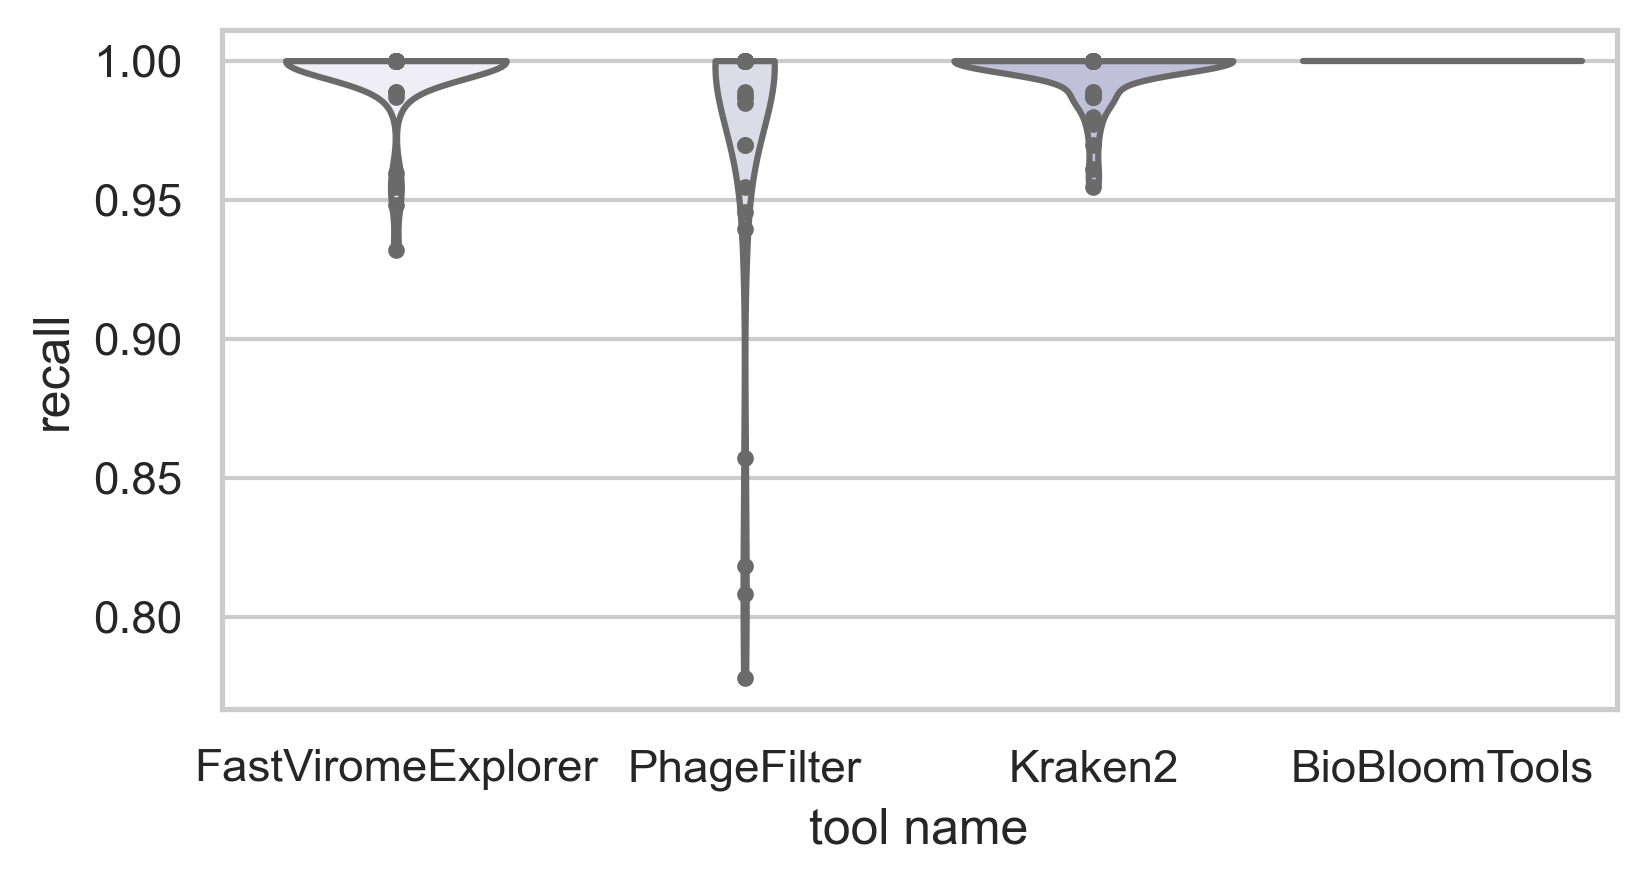

In [42]:
fig, ax1 = plt.subplots(figsize=(6, 3))
sns.violinplot(data=df, x="tool name", y="recall", cut=0, inner="point", palette=project_colors)

<AxesSubplot:xlabel='genome count in reads', ylabel='precision'>

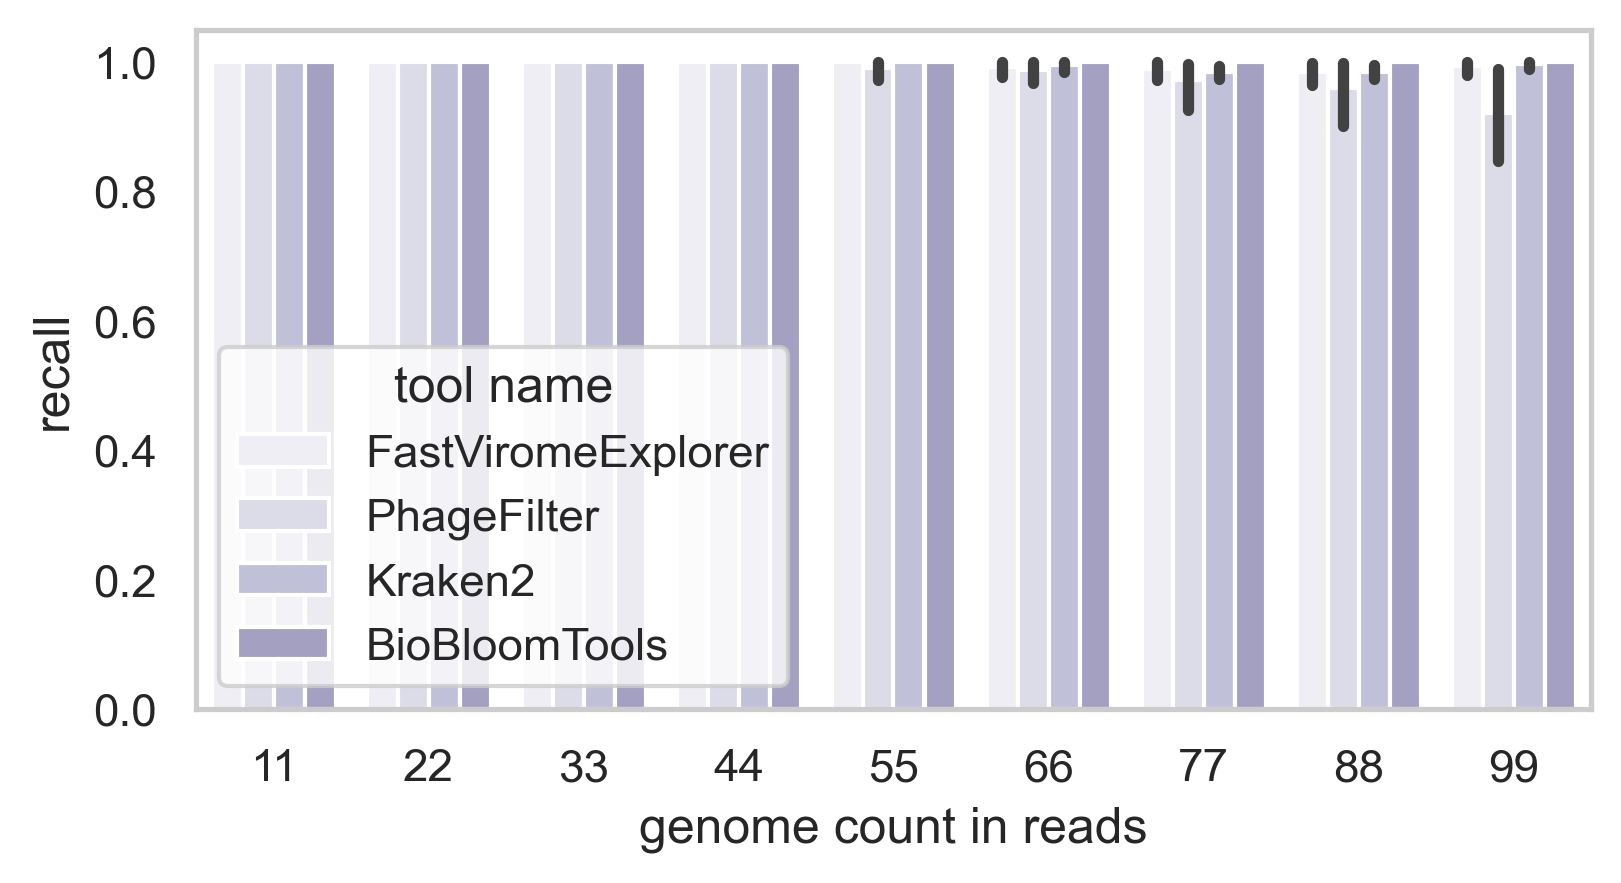

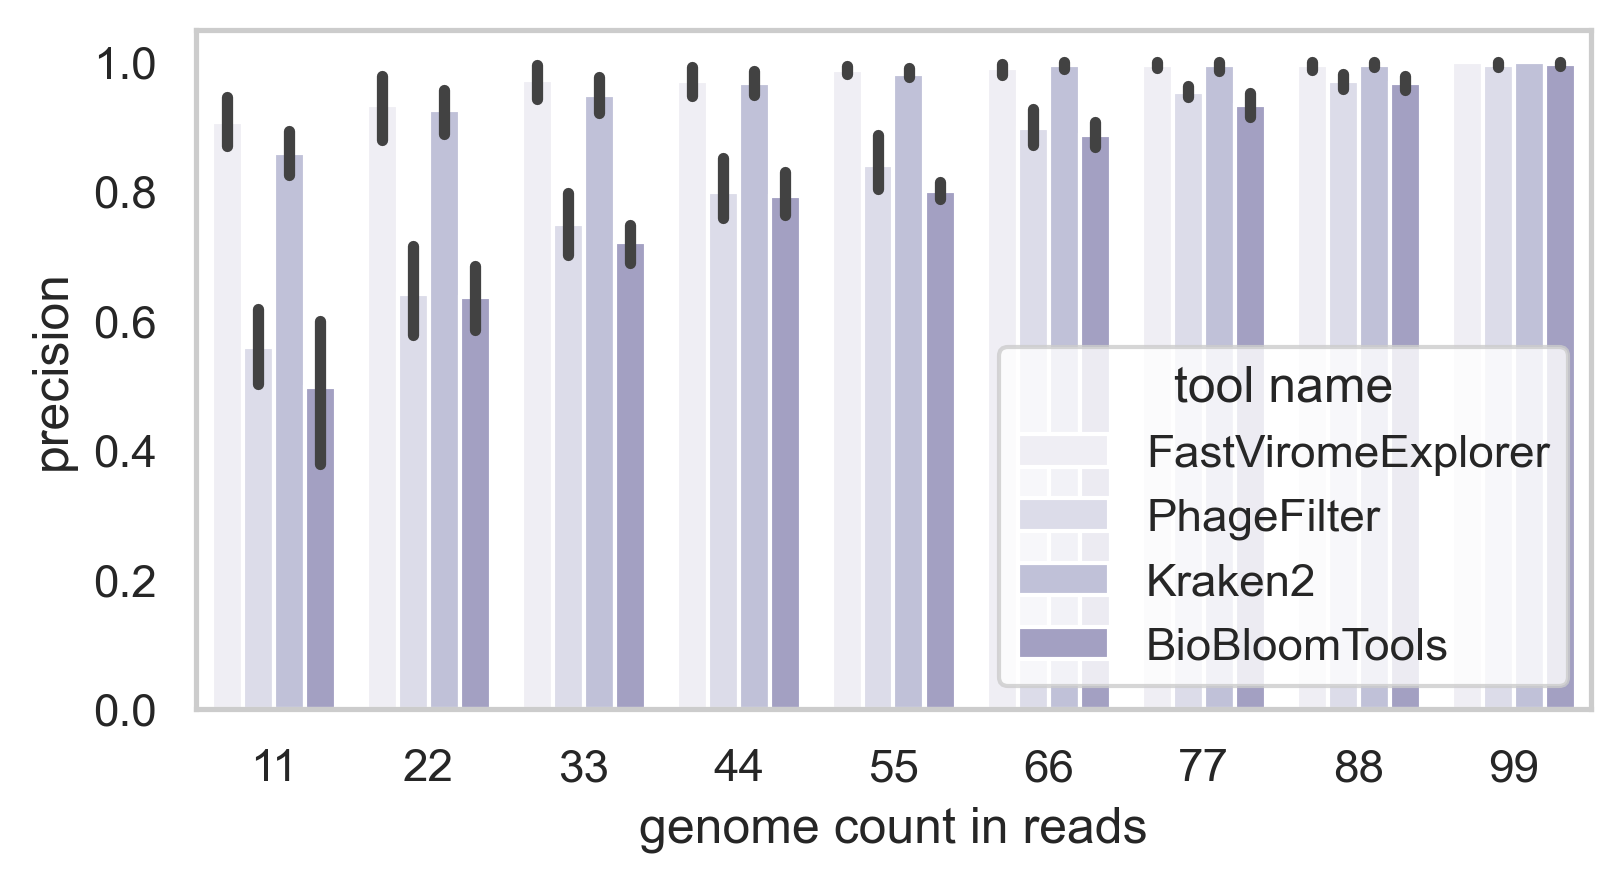

In [43]:
fig, ax1 = plt.subplots(figsize=(6, 3))
ax1.grid(False)
sns.barplot(data=df, x="genome count in reads", y="recall", hue="tool name", palette=project_colors)

fig, ax1 = plt.subplots(figsize=(6, 3))
ax1.grid(False)
sns.barplot(data=df, x="genome count in reads", y="precision", hue="tool name", palette=project_colors)

<AxesSubplot:xlabel='tool name', ylabel='recall'>

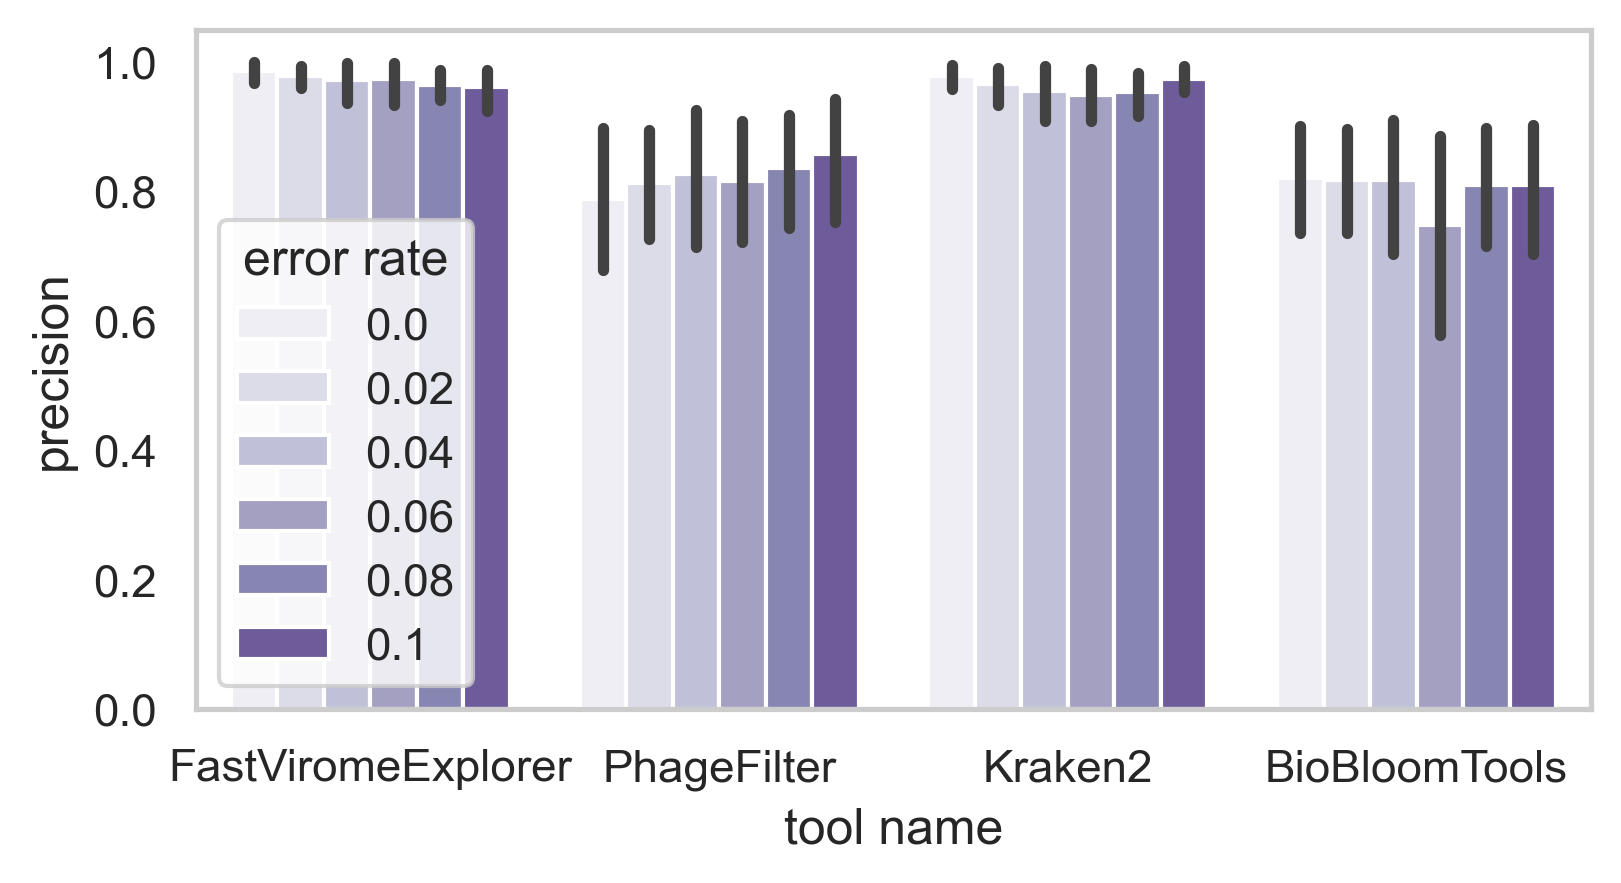

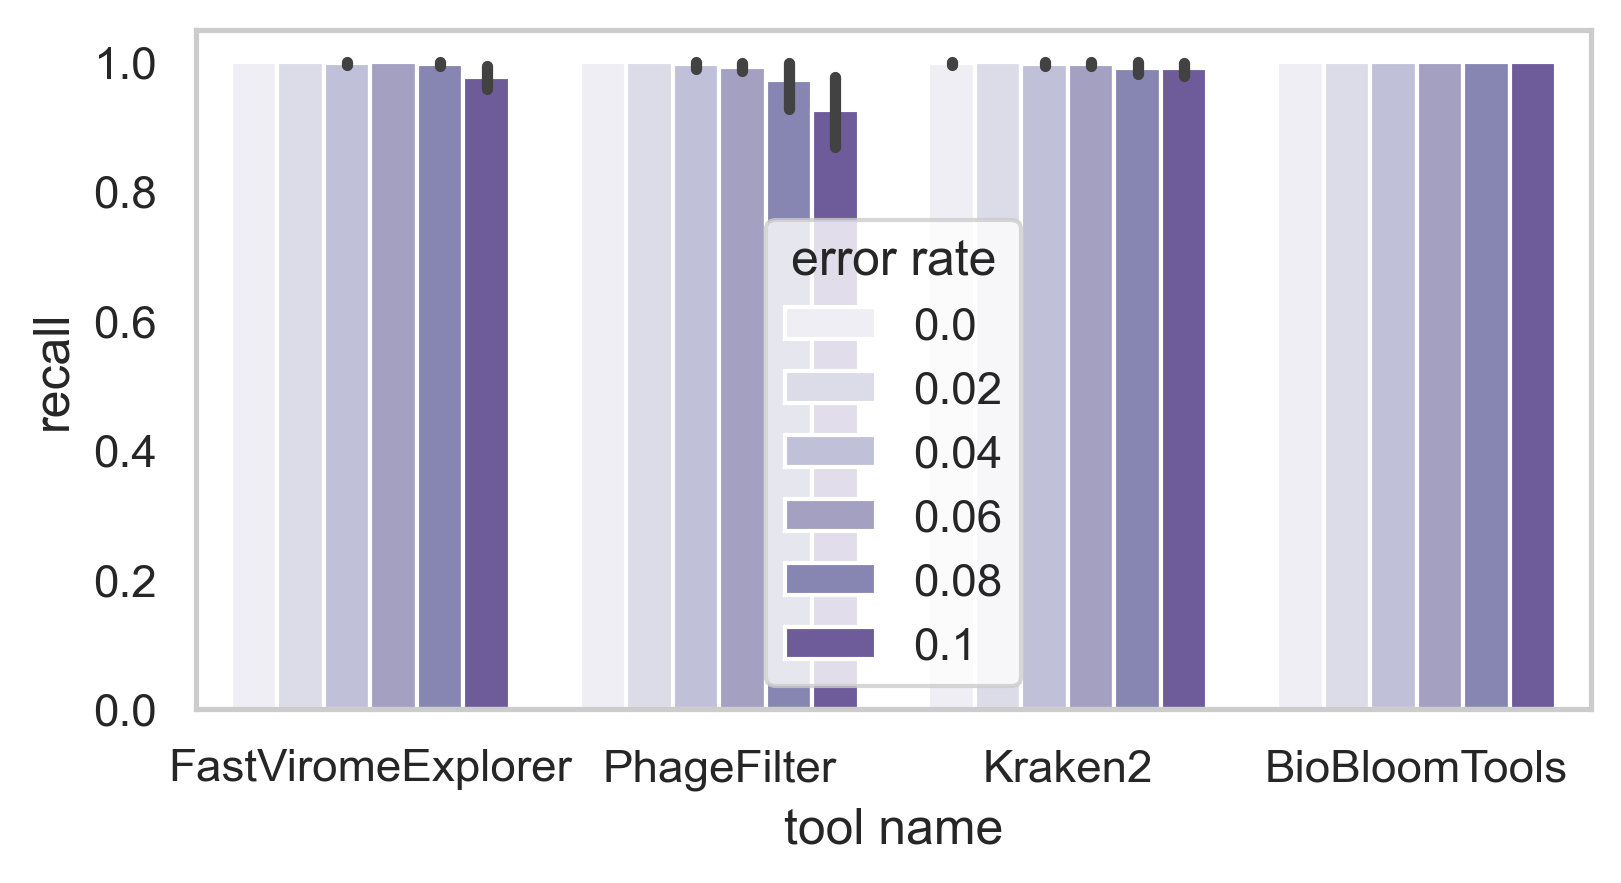

In [44]:
fig, ax1 = plt.subplots(figsize=(6, 3))
ax1.grid(False)
sns.barplot(data=df, x="tool name", y="precision", hue="error rate", palette=project_colors)

fig, ax1 = plt.subplots(figsize=(6, 3))
ax1.grid(False)
sns.barplot(data=df, x="tool name", y="recall", hue="error rate", palette=project_colors)

(0.3, 1.0316666666666667)

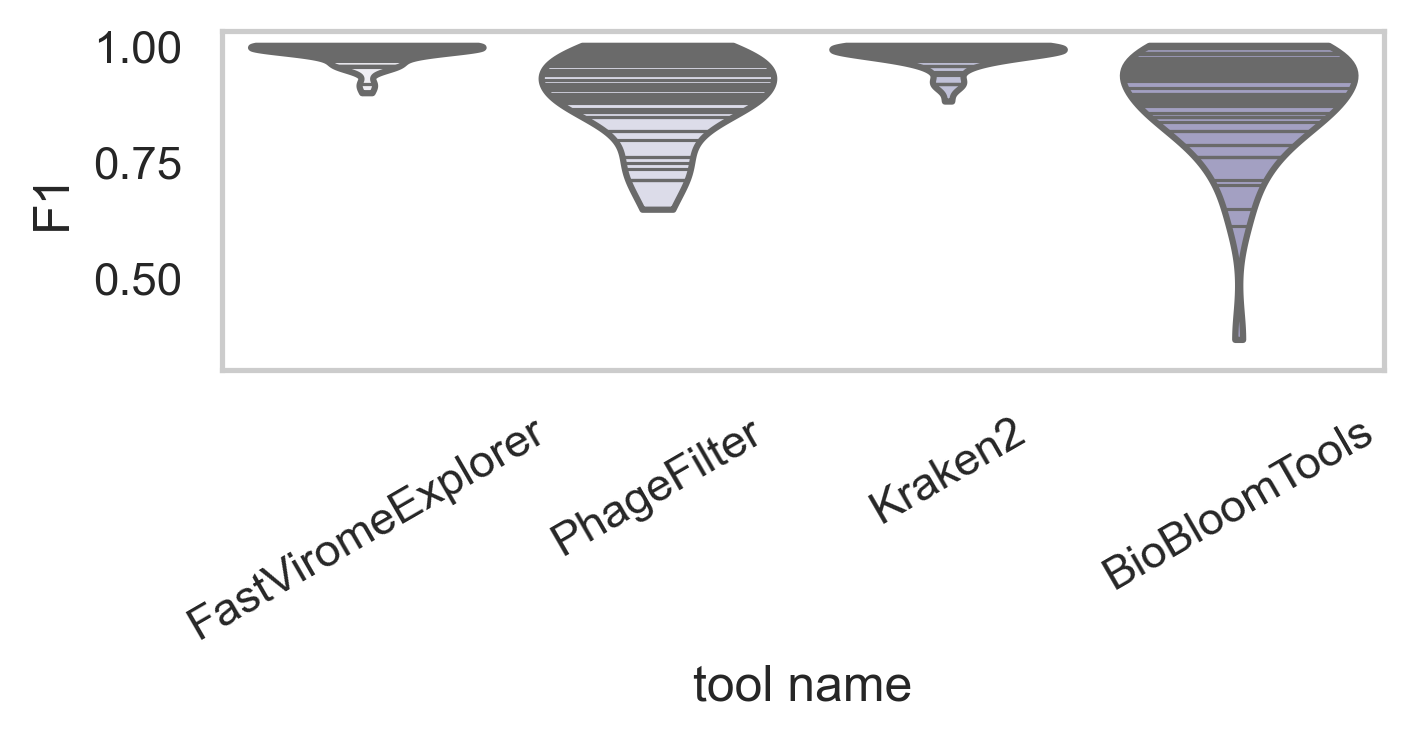

In [45]:
fig, ax1 = plt.subplots(figsize=(5, 1.5))
ax1.grid(False)
sns.violinplot(data=df, x="tool name", y="F1", cut=0, inner="stick", palette=project_colors, scale="width", bw=0.5)
ax1.xaxis.set_tick_params(rotation=30)
ax1.set_ylim(bottom=.30)

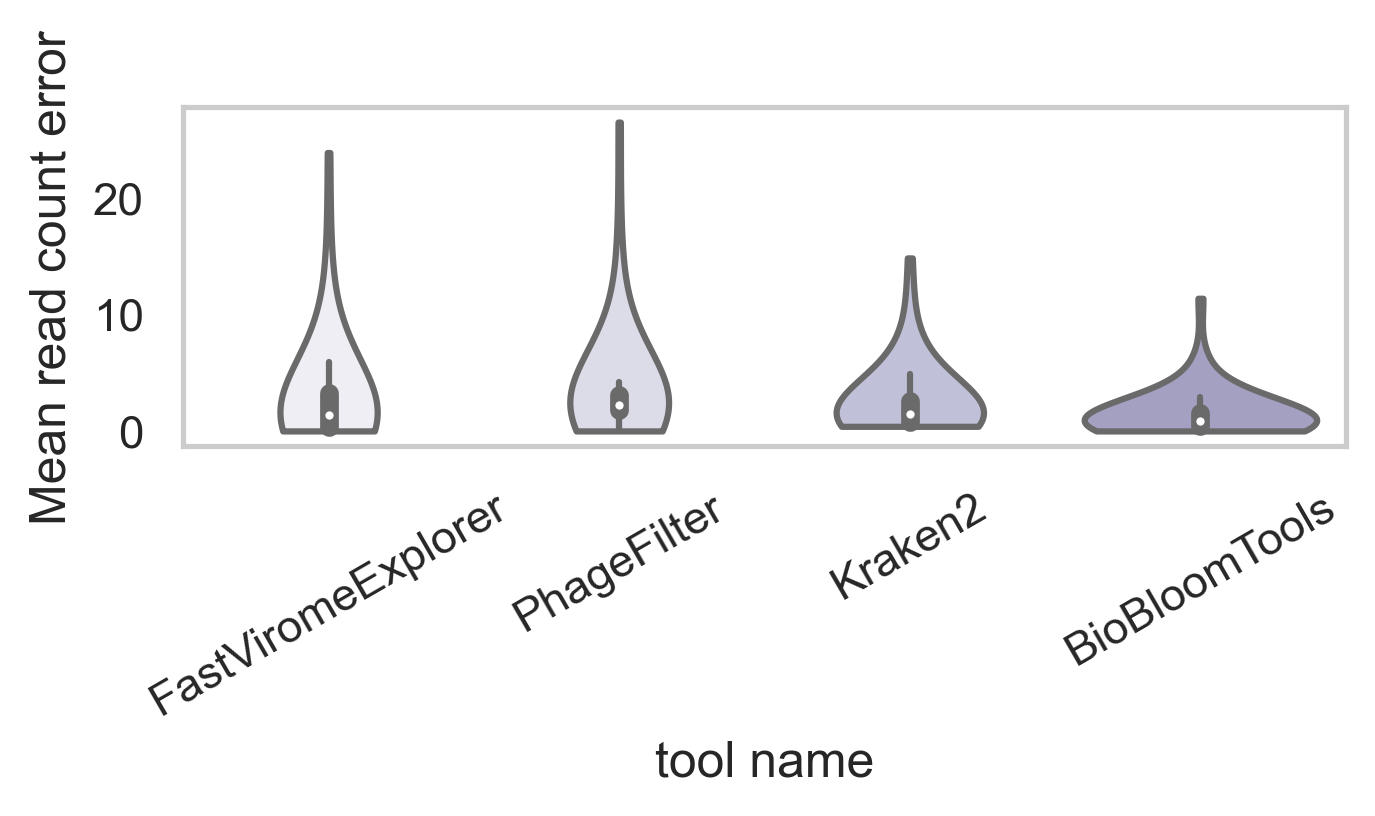

In [46]:
fig, ax1 = plt.subplots(figsize=(5, 1.5))
ax1.grid(False)
sns.violinplot(data=df, x="tool name", y="Mean read count error", cut=0, palette=project_colors, inner="box", bw=1)
ax1.xaxis.set_tick_params(rotation=30)

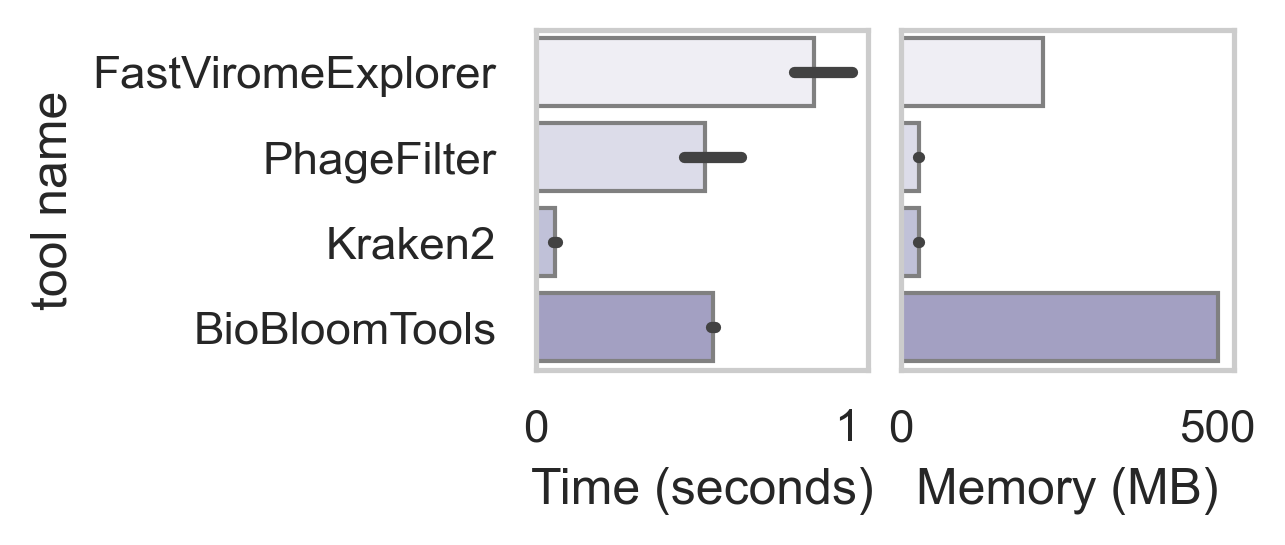

In [47]:
# Create a single figure with two subplots arranged in a single row
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3, 1.5))
ax1.grid(False)
ax2.grid(False)

# First subplot: Time (seconds)
sns.barplot(data=df, x="Time (seconds)", y="tool name", palette=project_colors, edgecolor=".5", ax=ax1)
ax1.set_xlabel('Time (seconds)')

# Second subplot: Memory (MB)
sns.barplot(data=df, x="Memory (MB)", y="tool name", palette=project_colors, edgecolor=".5", ax=ax2)
ax2.set_xlabel('Memory (MB)')
ax2.set_yticks([])  # Remove the y-axis ticks for the second subplot
ax2.set(ylabel=None)

# Adjust the space between the two subplots
plt.subplots_adjust(wspace=0.1)

# Show the combined plot
plt.show()

---
---
# filter performance
---
---

In [48]:
filter_performance_csv = "../results/res_filter_performance.csv"

In [49]:
# open dataframe
df = csv2dataframe(filter_performance_csv)
df.describe()

contamination percentage  error rate          time         memory  \
count                108.000000  108.000000  1.080000e+02     108.000000   
mean                  73.900000    0.050000  6.935126e+09  198626.962963   
std                   37.678175    0.034316  6.868434e+09  214948.290152   
min                    0.000000    0.000000  1.597422e+08   27484.000000   
25%                   50.000000    0.020000  3.110308e+08   49612.000000   
50%                   97.000000    0.050000  2.834143e+09   53232.000000   
75%                   99.500000    0.080000  1.524940e+10  500728.000000   
max                   99.900000    0.100000  1.753901e+10  500776.000000   

           recall   precision  
count  108.000000  108.000000  
mean     0.815792    0.823005  
std      0.240325    0.230472  
min      0.172000    0.260870  
25%      0.735795    0.738311  
50%      0.938090    0.944890  
75%      0.999000    0.998380  
max      1.000000    1.000000

In [50]:
# data transformations
df["F1"] = 2* df["precision"]*df["recall"] / (df["precision"]+df["recall"])
df["Memory (MB)"] = df["memory"] / (10)**3
df["Time (seconds)"] = df["time"] / (10**9)

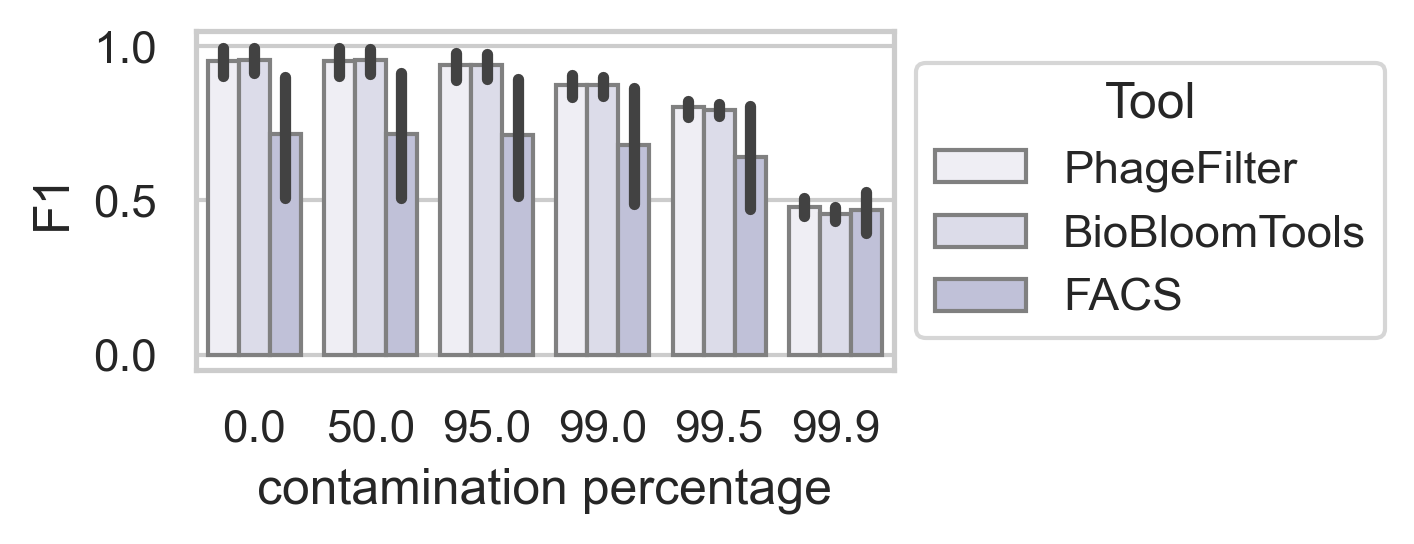

In [51]:
fig, ax1 = plt.subplots(figsize=(3, 1.5))


sns.barplot(data=df, x="contamination percentage", y="F1", hue="tool name",  palette=project_colors, edgecolor=".5")
legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Tool")
ax1.set_ylim(bottom=-.05, top=1.05)
plt.show()

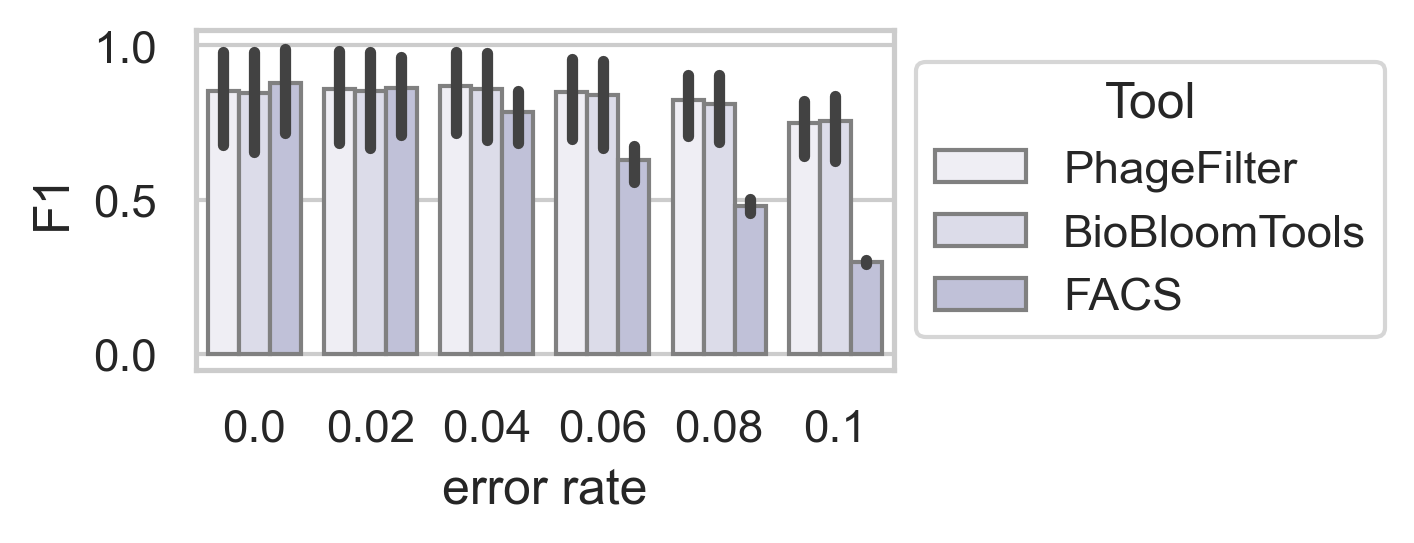

In [318]:
fig, ax1 = plt.subplots(figsize=(3, 1.5))
sns.barplot(data=df, x="error rate", y="F1", hue="tool name",  palette=project_colors, edgecolor=".5")

legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Tool")
ax1.set_ylim(bottom=-.05, top=1.05)
plt.show()

---
---
# Memory consumption
---
---

In [123]:
filter_memory_csv = "../results/res_filter_memory.csv"

In [124]:
# open dataframe
df = csv2dataframe(filter_memory_csv)
df.describe()

genome count     read count    build time  build memory  \
count     90.000000      90.000000  9.000000e+01  9.000000e+01   
mean     350.000000   55000.000000  1.417004e+11  2.651594e+06   
std      181.751775   45252.102813  1.714800e+11  3.111986e+06   
min       70.000000   10000.000000  1.253251e+09  2.979600e+04   
25%      210.000000   10000.000000  1.807397e+10  2.198640e+05   
50%      350.000000   55000.000000  6.051599e+10  1.210336e+06   
75%      490.000000  100000.000000  2.245869e+11  5.336620e+06   
max      630.000000  100000.000000  6.887178e+11  7.978332e+06   

       contamination percentage    query time  query memory  
count                      90.0  9.000000e+01  9.000000e+01  
mean                       20.0  4.654613e+09  5.418902e+05  
std                         0.0  9.341242e+09  7.892813e+05  
min                        20.0  1.461446e+08  3.271200e+04  
25%                        20.0  3.514683e+08  4.649900e+04  
50%                        20.0  1.415868e+09  7.620200e+04  
75%                        20.0  4.171861e+09  8.685950e+05  
max                        20.0  4.738575e+10  3.010016e+06

In [125]:
# transformations
df["Memory (MB)"] = df["query memory"] / (10**3)
df["Time (seconds)"] = df["query time"] / (10**9)
df["Build Memory (MB)"] = df["build memory"] / (10**3)
df["Build Time (seconds)"] = df["build time"] / (10**9)

# dataframe of low mem tools
df_lowmem = df.drop(df[df["tool name"] == "FastViromeExplorer"].index)
df_lowmem = df_lowmem.drop(df[df["tool name"] == "BioBloomTools"].index)


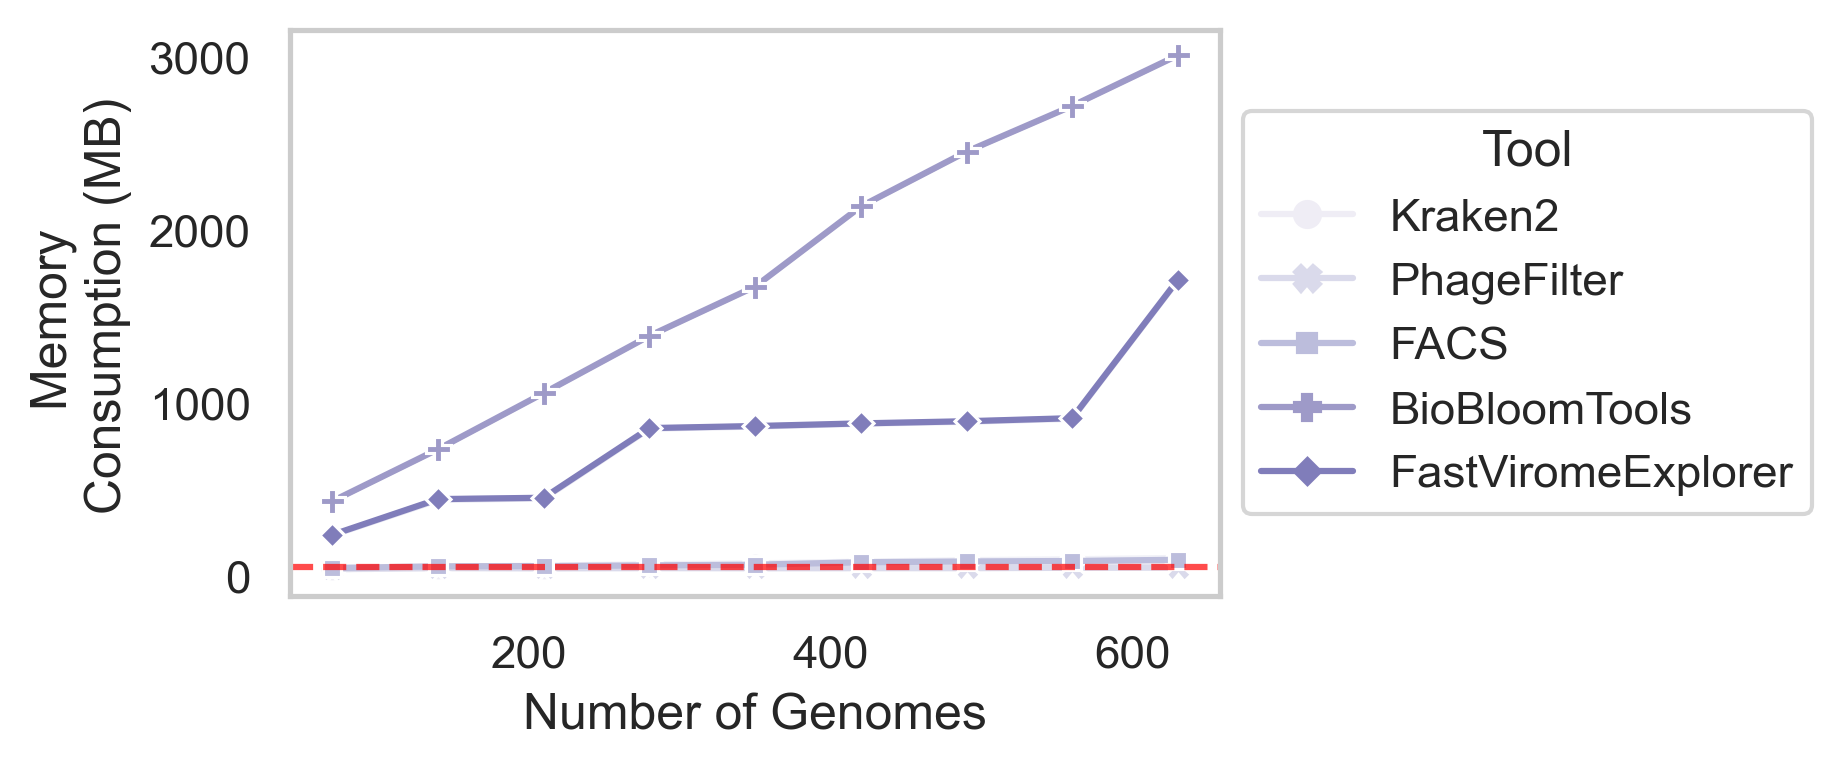

In [126]:
fig, ax1 = plt.subplots(figsize=(4, 2.5))
ax1.grid(False)

# plot
color_count = len(pandas.unique(df["tool name"]))
sns.lineplot(
    data=df,
    x="genome count", y="Memory (MB)", hue="tool name", style="tool name",
    markers=True, dashes=False,
    palette= project_colors[:color_count] # [project_colors[1], project_colors[4]] # colors for Kraken2/PF
)

# memory cutoff
ax1.axhline(y=50, linestyle='--', color='red', alpha=0.7)

ax1.set_xlabel('Number of Genomes')
ax1.set_ylabel('Memory \n Consumption (MB)')

legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Tool")

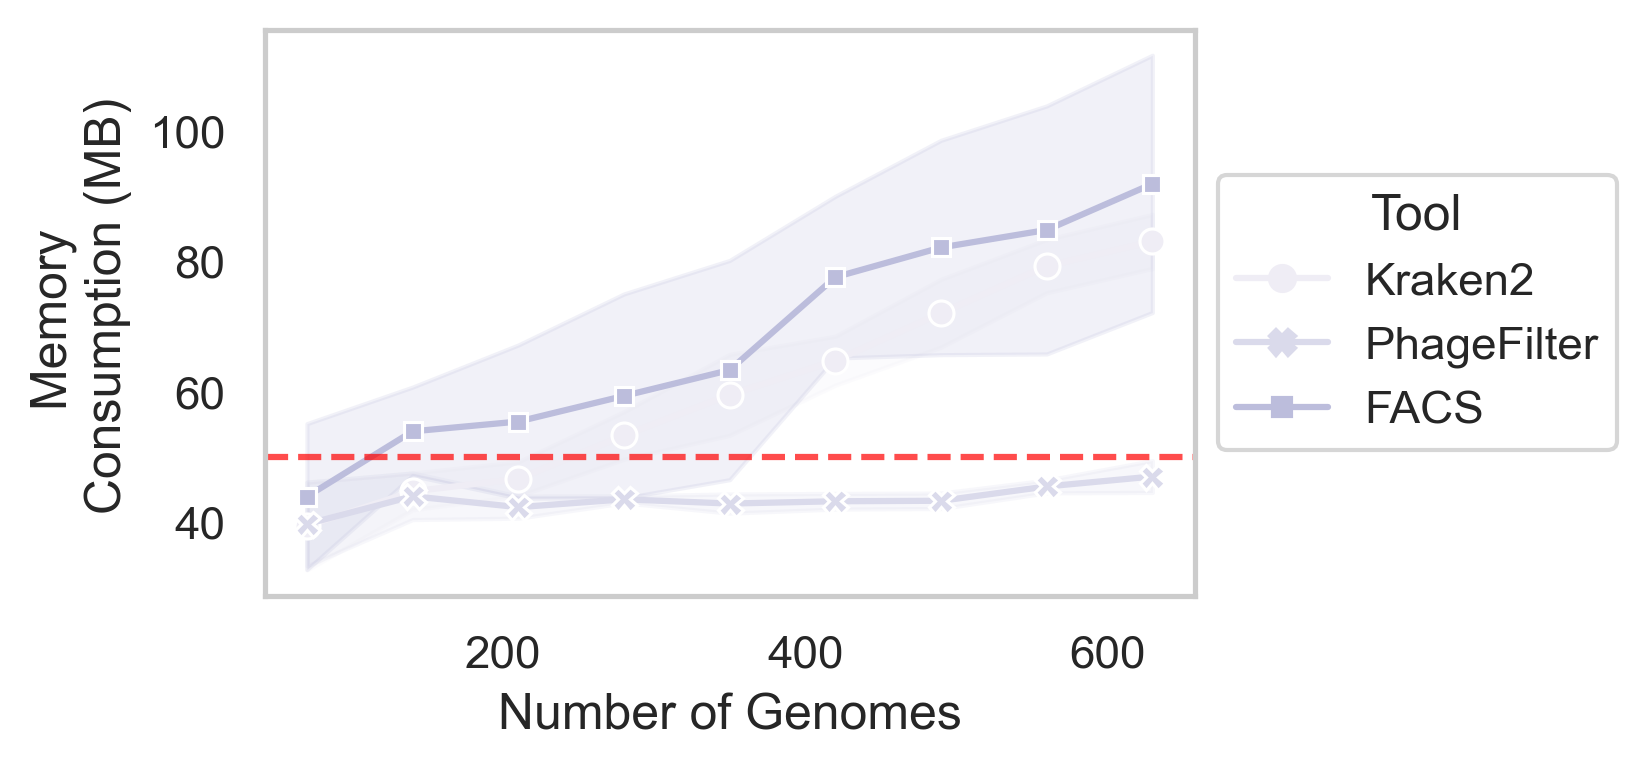

In [127]:
fig, ax1 = plt.subplots(figsize=(4, 2.5))
ax1.grid(False)

# plot
color_count = len(pandas.unique(df_lowmem["tool name"]))
sns.lineplot(
    data=df_lowmem,
    x="genome count", y="Memory (MB)", hue="tool name", style="tool name",
    markers=True, dashes=False,
    palette= project_colors[:color_count] # [project_colors[1], project_colors[4]] # colors for Kraken2/PF
)

ax1.set_xlabel('Number of Genomes')
ax1.set_ylabel('Memory \n Consumption (MB)')

# rasberry pi memory cutoff
ax1.axhline(y=50, linestyle='--', color='red', alpha=0.7)

legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Tool")

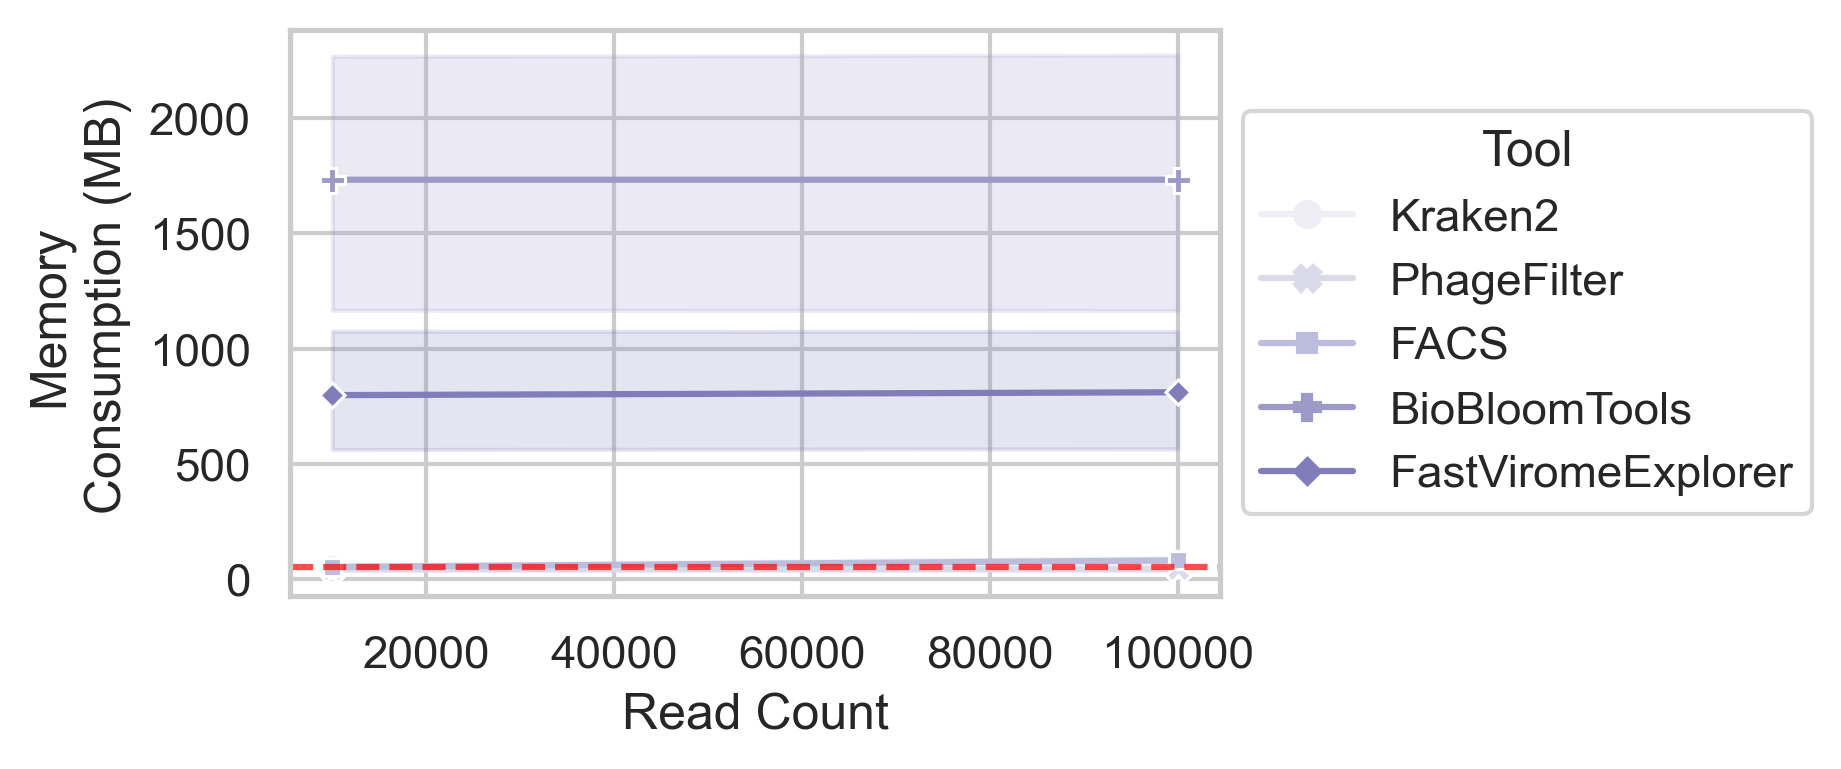

In [128]:
fig, ax1 = plt.subplots(figsize=(4, 2.5))

# plot
color_count = len(pandas.unique(df["tool name"]))
sns.lineplot(
    data=df,
    x="read count", y="Memory (MB)", hue="tool name", style="tool name",
    markers=True, dashes=False,
    palette=project_colors[:color_count]
)

ax1.set_xlabel('Read Count')
ax1.set_ylabel('Memory \n Consumption (MB)')

# rasberry pi memory cutoff
ax1.axhline(y=55, linestyle='--', color='red', alpha=0.7)

legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Tool")

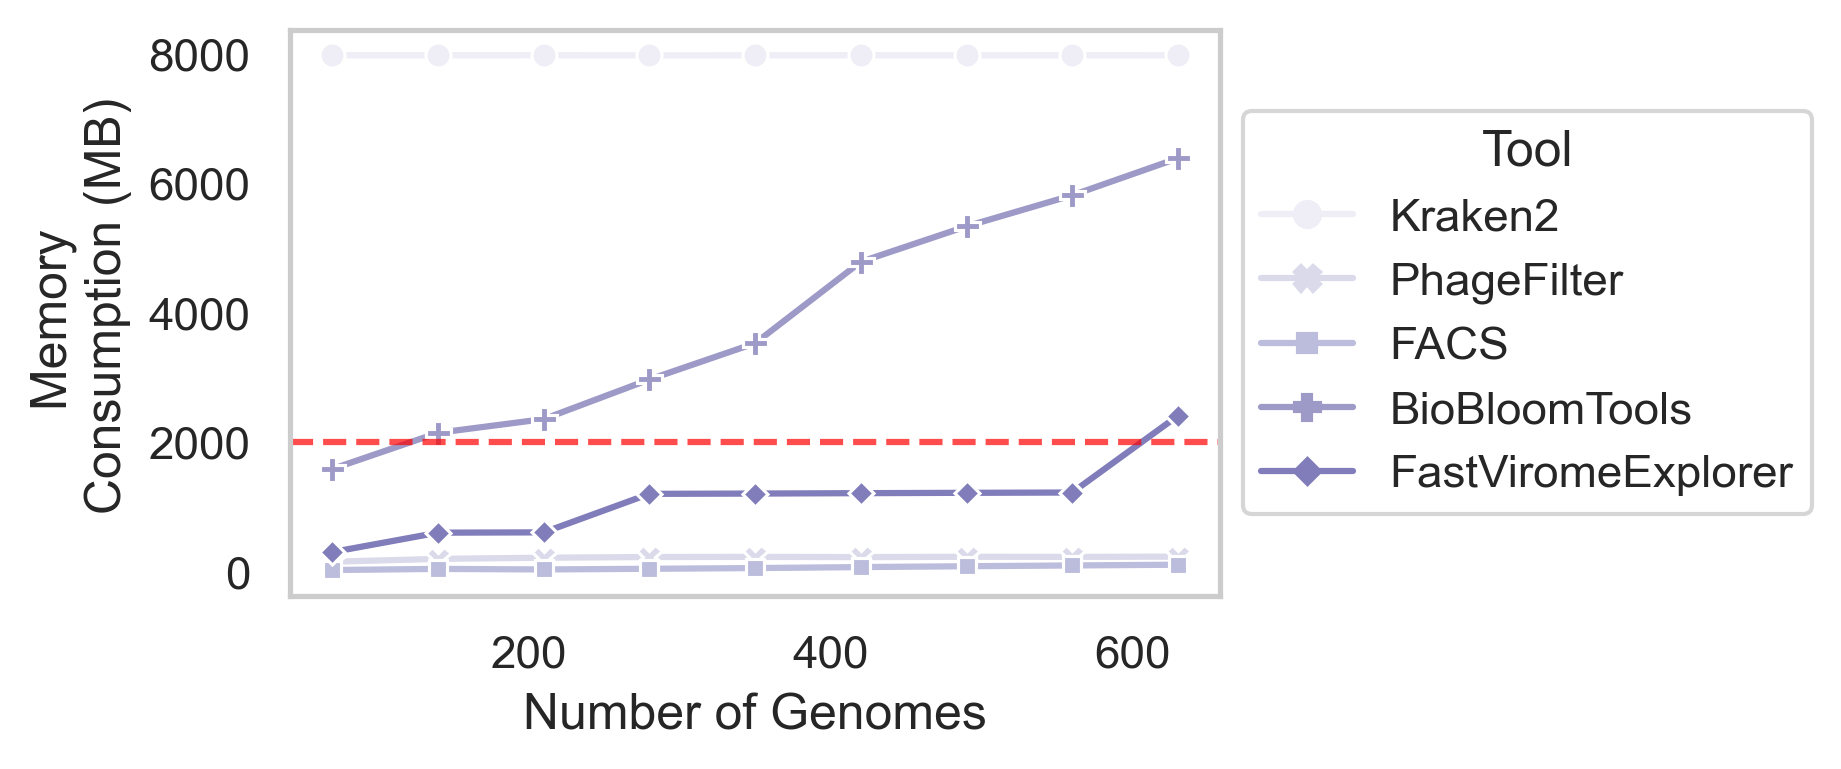

In [129]:
fig, ax1 = plt.subplots(figsize=(4, 2.5))
ax1.grid(False)

# plot
color_count = len(pandas.unique(df["tool name"]))
sns.lineplot(
    data=df,
    x="genome count", y="Build Memory (MB)", hue="tool name", style="tool name",
    markers=True, dashes=False,
    palette=project_colors[:color_count]
)

ax1.set_xlabel('Number of Genomes')
ax1.set_ylabel('Memory \n Consumption (MB)')

# rasberry pi memory cutoff
ax1.axhline(y=2000, linestyle='--', color='red', alpha=0.7)

legend = ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Tool")

---
---
# Threading
---
---

In [325]:
threading_csv = "../results/res_threading.csv"

In [326]:
# open dataframe
df = csv2dataframe(threading_csv)
df.describe()

threads  read count  build time (ns)  build memory (bytes)  \
count  12.000000        12.0     1.200000e+01          1.200000e+01   
mean    2.500000   1000000.0     6.539735e+08          3.766204e+07   
std     1.167748         0.0     9.009191e+07          5.363723e+05   
min     1.000000   1000000.0     5.231581e+08          3.675341e+07   
25%     1.750000   1000000.0     5.679364e+08          3.720704e+07   
50%     2.500000   1000000.0     6.592653e+08          3.756851e+07   
75%     3.250000   1000000.0     7.239531e+08          3.817472e+07   
max     4.000000   1000000.0     7.728865e+08          3.836723e+07   

       query time (ns)  query memory (bytes)  
count     1.200000e+01          1.200000e+01  
mean      1.726293e+11          4.751468e+09  
std       4.933637e+10          3.392062e+07  
min       1.168958e+11          4.650496e+09  
25%       1.357246e+11          4.752182e+09  
50%       1.451995e+11          4.763552e+09  
75%       2.308968e+11          4.766047e+09  
max       2.446090e+11          4.776145e+09

In [327]:
# data transformations
df["Build Time (seconds)"] = df["build time (ns)"] / (10**9)
df["Query Time (seconds)"] = df["query time (ns)"]  /  (10**9)

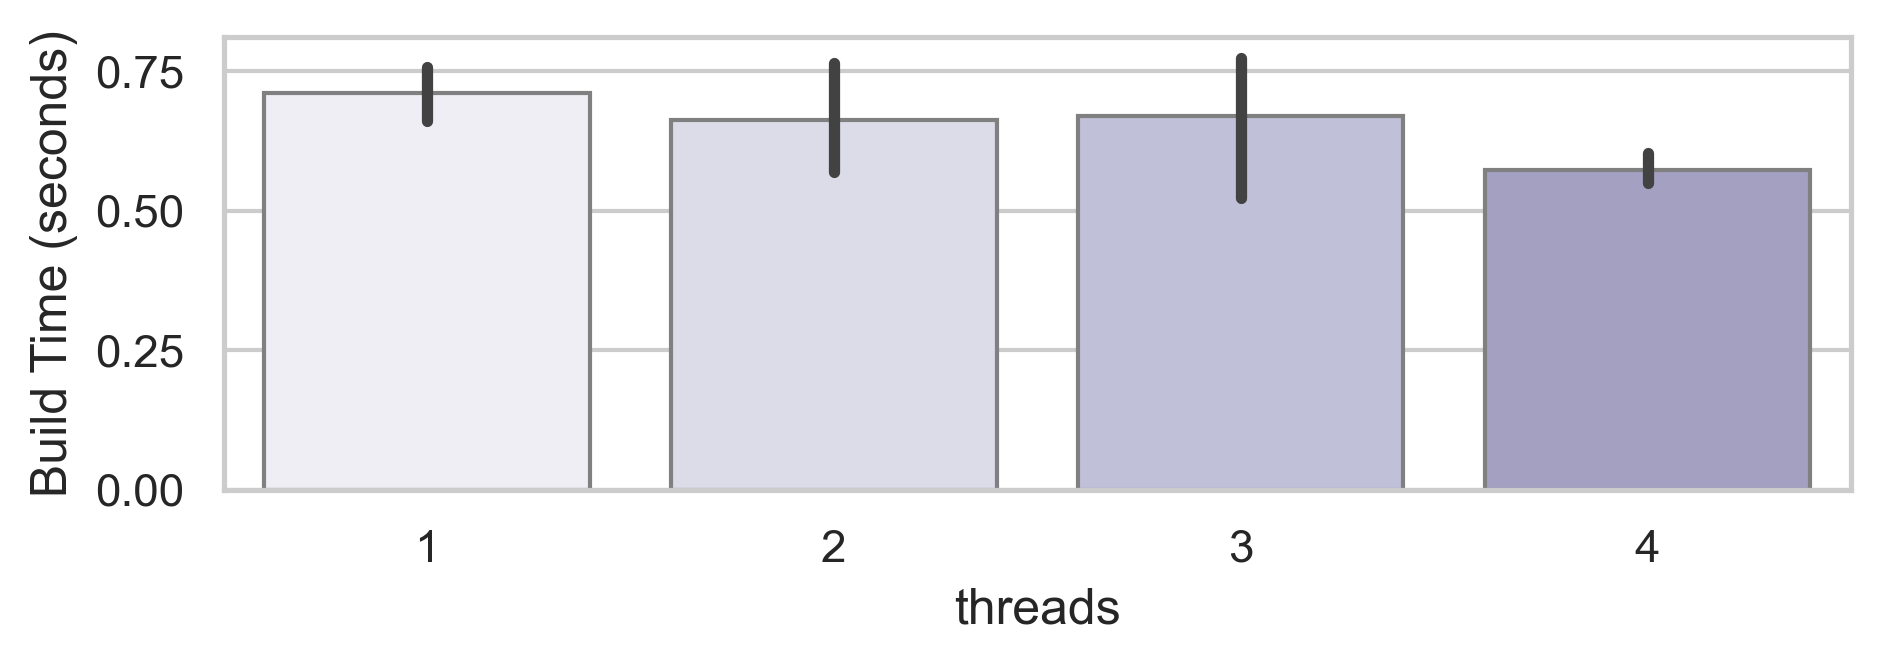

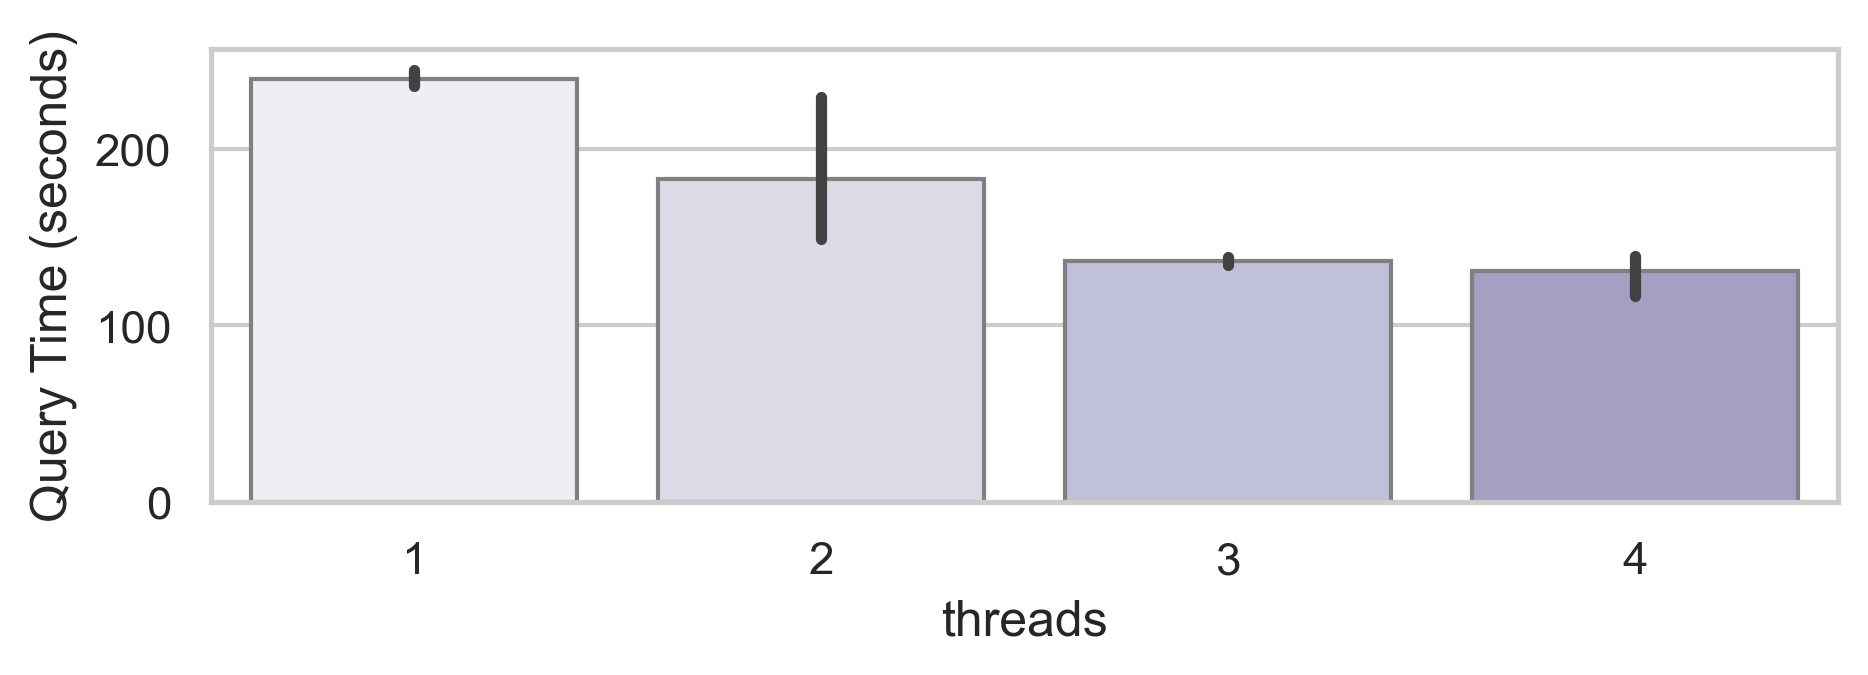

In [328]:
fig, ax1 = plt.subplots(figsize=(7, 2))
#ax2 = ax1.twinx()

# who v/s fare barplot
sns.barplot(x = 'threads',
            y = "Build Time (seconds)",
            data = df,
            palette = project_colors,
            edgecolor=".5")
 
# Show the plot
plt.show()

fig, ax1 = plt.subplots(figsize=(7, 2))
sns.barplot(x = 'threads',
            y = "Query Time (seconds)",
            data = df,
            palette = project_colors,
            edgecolor=".5")

plt.show()

---
---
# Read length 
---
---

In [329]:
readlen_csv = "../results/res_readlength.csv"

In [330]:
# data transformations
df = csv2dataframe(readlen_csv)
df.describe()

genome count   read count   read length  query time (ns)  \
count          10.0     10.00000     10.000000     1.000000e+01   
mean           51.0   5500.00000   2290.000000     2.457922e+09   
std             0.0   4743.41649   4078.452866     4.856822e+09   
min            51.0   1000.00000    100.000000     2.105125e+08   
25%            51.0   1000.00000    150.000000     4.126485e+08   
50%            51.0   5500.00000    200.000000     7.840477e+08   
75%            51.0  10000.00000   1000.000000     1.828190e+09   
max            51.0  10000.00000  10000.000000     1.611112e+10   

       query memory (bytes)  classification recall  classification precision  \
count          1.000000e+01                   10.0                 10.000000   
mean           2.138348e+05                    1.0                  0.684583   
std            3.657201e+05                    0.0                  0.132883   
min            2.771200e+04                    1.0                  0.526316   
25%            3.329400e+04                    1.0                  0.563725   
50%            4.343600e+04                    1.0                  0.669643   
75%            1.181740e+05                    1.0                  0.769231   
max            1.139468e+06                    1.0                  0.909091   

       filter recall  filter precision  
count      10.000000         10.000000  
mean        0.903180          0.998170  
std         0.089012          0.002277  
min         0.782000          0.992386  
25%         0.851100          0.997828  
50%         0.880600          0.998078  
75%         0.997900          0.999950  
max         1.000000          1.000000

In [331]:
# transform
df["Query Memory (MB)"] = df["query memory (bytes)"] / (10)**3
df["Query Time (seconds)"] = df["query time (ns)"] / (10**9)
df["classification F1"] = 2* df["classification precision"]*df["classification recall"] / (df["classification precision"]+df["classification recall"])
df["filter F1"] = 2* df["filter precision"]*df["filter recall"] / (df["filter precision"]+df["filter recall"])

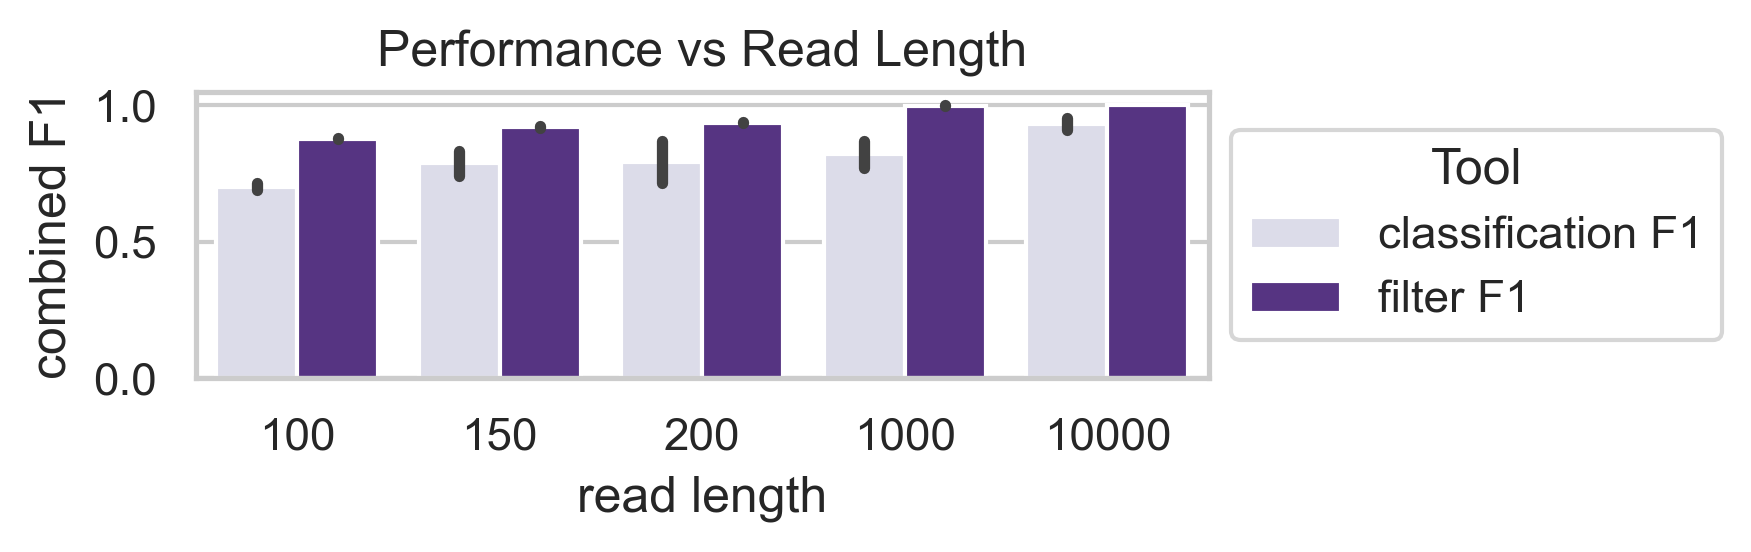

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, melt the dataframe to have a single 'precision' column and a new column for the type (classification or filter)
df_melted = df.melt(id_vars='read length', value_vars=["classification F1", "filter F1"], 
                    var_name='F1', value_name='combined F1')

fig, ax = plt.subplots(figsize=(6, 2))

# Combined barplot
sns.barplot(x='read length',
            y='combined F1',
            hue='F1', 
            data=df_melted,
            palette=[project_colors[1], project_colors[6]],
            ax=ax)

# put legend on the rightside
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Tool")

ax.set_title('Performance vs Read Length')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

---
---
# Depth testing
---
---

In [333]:
depth_csv = "../results/res_depth.csv"

In [334]:
# open dataframe
df = csv2dataframe(depth_csv)
df.describe()

replicate  tree depth  genome count      error          time  \
count  72.000000   72.000000          72.0  72.000000  7.200000e+01   
mean    1.000000    3.500000         100.0   0.020000  5.233764e+09   
std     0.822226    2.307367           0.0   0.016445  1.453286e+09   
min     0.000000    0.000000         100.0   0.000000  3.110968e+09   
25%     0.000000    1.750000         100.0   0.000000  3.624826e+09   
50%     1.000000    3.500000         100.0   0.020000  5.652793e+09   
75%     2.000000    5.250000         100.0   0.040000  6.426262e+09   
max     2.000000    7.000000         100.0   0.040000  7.279655e+09   

       filter recall  filter precision  
count      72.000000         72.000000  
mean        0.972491          0.758162  
std         0.046893          0.383075  
min         0.871242          0.099820  
25%         0.987275          0.724292  
50%         0.999649          0.983445  
75%         1.000000          0.987181  
max         1.000000          0.988417

In [335]:
# transform
df["Query Time (seconds)"] = df["time"] / (10**9)
df = df[df["tree depth"] <= 3]

Text(0.5, 1.0, 'Precision and Recall by Tree Depth')

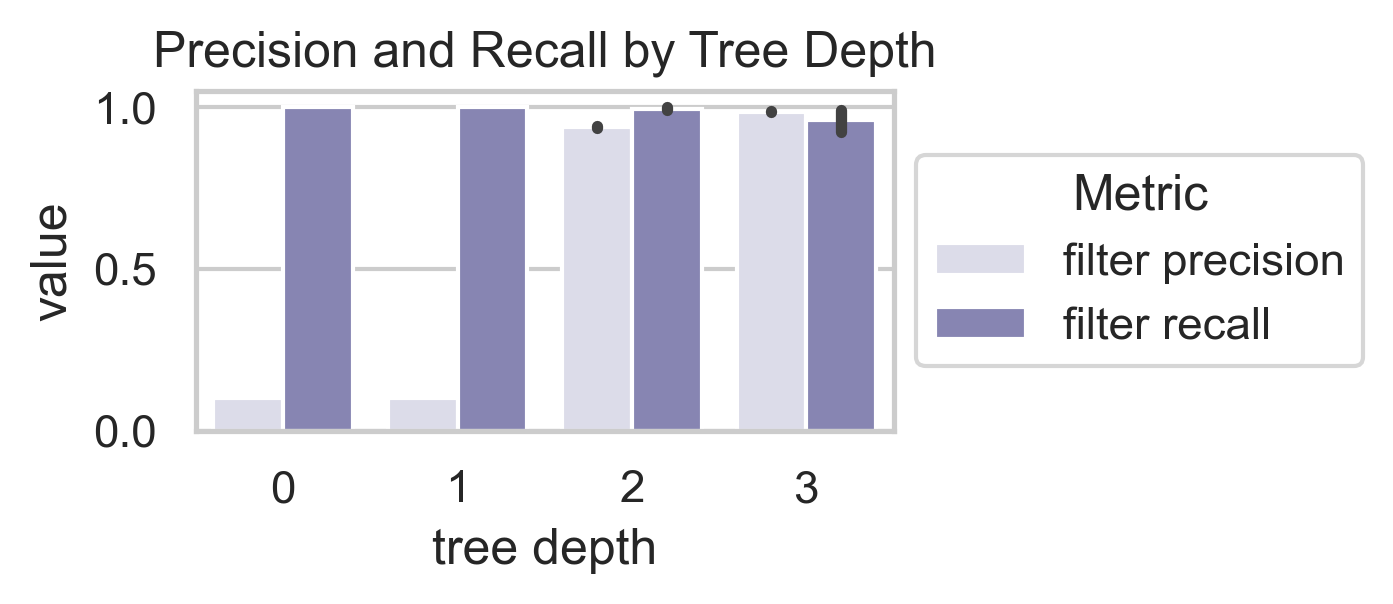

In [336]:
fig, ax = plt.subplots(figsize=(3, 1.5))

# Melt the DataFrame into a long format
df_melted = df.melt(id_vars='tree depth', value_vars=['filter precision', 'filter recall'], var_name='metric', value_name='value')

# Plot the bar chart with both precision and recall
sns.barplot(data=df_melted, x="tree depth", y="value", hue="metric", palette=[project_colors[1], project_colors[4]], ax=ax)
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Metric")
ax.set_title('Precision and Recall by Tree Depth')

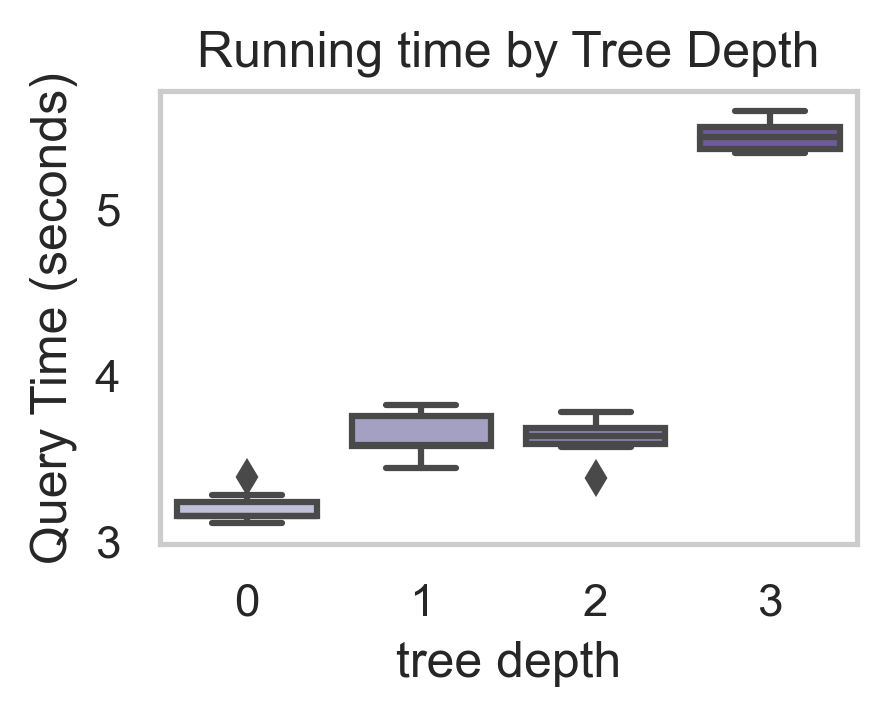

In [337]:
fig, ax = plt.subplots(figsize=(3, 2))

# plot time
sns.boxplot(data=df, x="tree depth", y="Query Time (seconds)", palette=project_colors[2:], ax=ax)
ax.set_title('Running time by Tree Depth')
ax.grid(False)

# Display the plot
plt.show()

# Blast Validation

## 1- Blast Verification

In [338]:
blast_results = "../results/RasPiData/res_blast_compare.csv"

In [339]:
# open dataframe
df = csv2dataframe(blast_results)
df.describe()

count  species agreement count  genus agreement count  \
count     2.000000                 2.000000               2.000000   
mean   1119.500000               844.500000            1118.500000   
std      78.488853                31.819805              77.074639   
min    1064.000000               822.000000            1064.000000   
25%    1091.750000               833.250000            1091.250000   
50%    1119.500000               844.500000            1118.500000   
75%    1147.250000               855.750000            1145.750000   
max    1175.000000               867.000000            1173.000000   

       species agreement count (if counting "MK373794" & "MK373794" as "KP719134")  
count                                           2.000000                            
mean                                          940.000000                            
std                                            41.012193                            
min                                           911.000000                            
25%                                           925.500000                            
50%                                           940.000000                            
75%                                           954.500000                            
max                                           969.000000

In [340]:
# transform
df["Species Accuracy"] = df["species agreement count"] / df["count"]
df["Genus Accuracy"] = df["genus agreement count"] / df["count"]

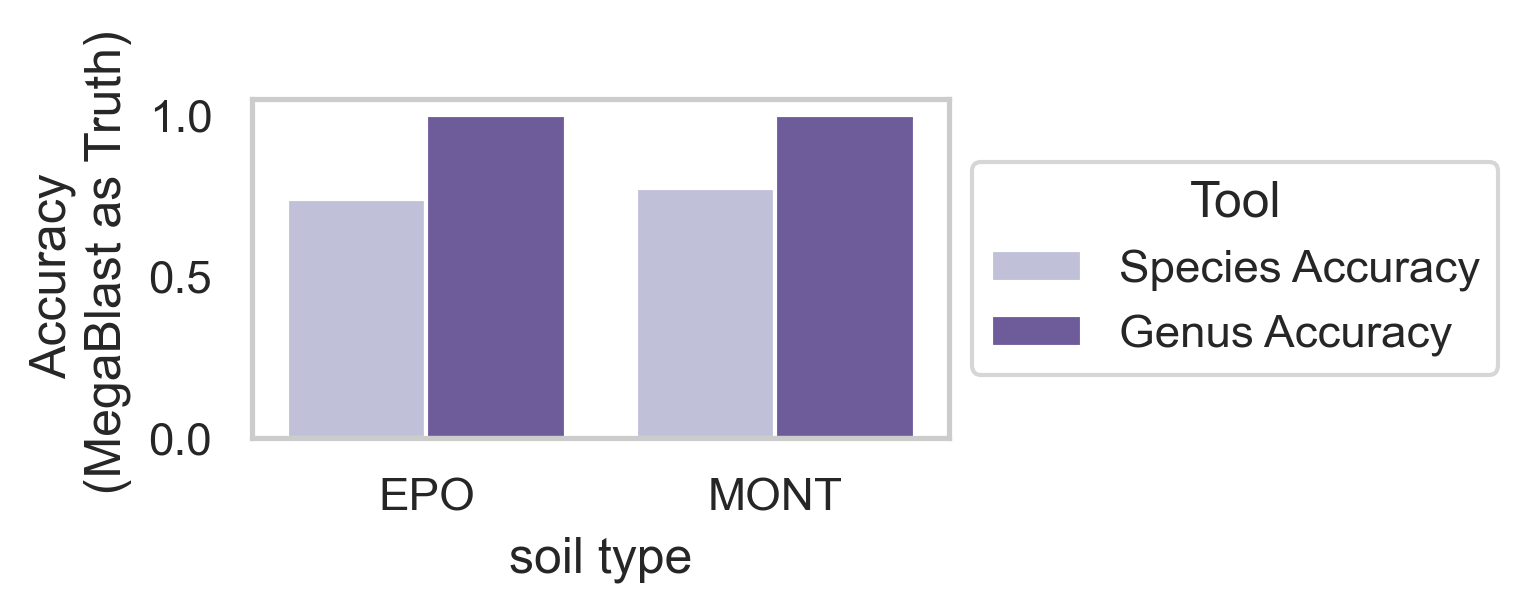

In [341]:
fig, ax = plt.subplots(figsize=(3, 1.5))

# Reshape the data frame
df_melted = pd.melt(df, id_vars=['soil type'], value_vars=['Species Accuracy', 'Genus Accuracy'], var_name='Accuracy Type', value_name='Accuracy')

# Plot the data
sns.barplot(data=df_melted, x='soil type', y='Accuracy', hue='Accuracy Type', palette=[project_colors[2],project_colors[5]], ax=ax)

ax.grid(False)

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title("Tool")
ax.set_ylabel('Accuracy \n (MegaBlast as Truth)')
# Display the plot
plt.show()


## 2 - Top Species

In [342]:
#classification_path = "../results/RasPiData/PRJNA550482_EPO_FULL/CLASSIFICATION.csv"
classification_path = "../results/RasPiData/PRJNA550482_MONT_FULL/CLASSIFICATION.csv"

In [343]:
# open dataframe
df = csv2dataframe(classification_path)
df.describe()

readcount
count   18.000000
mean    71.611111
std    230.450234
min      1.000000
25%     11.000000
50%     19.000000
75%     24.000000
max    994.000000

In [344]:
# data transformation
df["abundance"] = df["readcount"] / df["readcount"].sum()
df = df.nlargest(4, "abundance")
#df["-log(abundance)"] = np.log(df["abundance"]) # Tried to scale; instead went with zooming in.

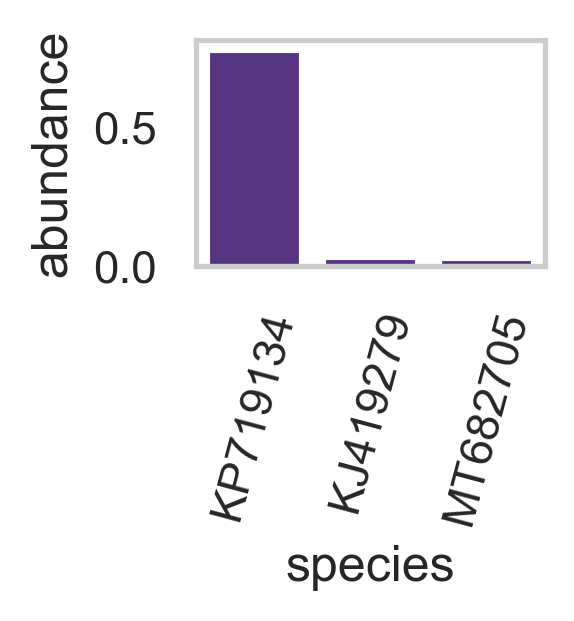

In [345]:
df = df.nlargest(3, "abundance")

fig, ax = plt.subplots(figsize=(1.5, 1))

# Plot the data
sns.barplot(data=df, x='species', y="abundance", color=project_colors[9], ax=ax)
ax.xaxis.set_tick_params(rotation=75)
ax.grid(False)
#ax.set_ylim(bottom=-.05, top=1.05)
# Display the plot
plt.show()

## 3 - Genus makeup

In [52]:
# classification_path = "../results/RasPiData/PRJNA550482_EPO_FULL/GENUS_CLASSIFICATION.csv"
classification_path = "../results/RasPiData/PRJNA550482_MONT_FULL/GENUS_CLASSIFICATION.csv"

In [53]:
# open dataframe
df = csv2dataframe(classification_path)
df.describe()

readcount
count     3.000000
mean    426.000000
std     580.643608
min       3.000000
25%      95.000000
50%     187.000000
75%     637.500000
max    1088.000000

In [54]:
# data transformation
df["abundance"] = df["readcount"] / df["readcount"].sum()
df = df.nlargest(2, "abundance")

/Users/dreyceyalbin/miniconda/envs/enrichseq/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  # Remove the CWD from sys.path while we load stuff.


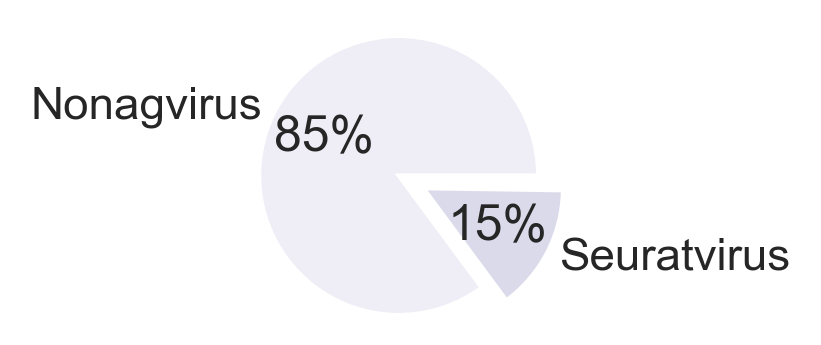

In [55]:
fig, ax = plt.subplots(figsize=(1.5, 1))

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
#plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

# Plot the data
plt.pie(df['abundance'], explode=(0, 0.2), labels=df['genus'], colors=project_colors, autopct='%.0f%%')
ax.xaxis.set_tick_params(rotation=75)
ax.grid(False)
ax.set_ylim(bottom=-.05, top=1.05)
# Display the plot
plt.show()